<h1> Opis projektu - PROW </h1>

<h2><b> Analiza demograficzna Korei Południowej i Japonii w porównaniu do wybranych krajów europejskich </b></h2>

W niniejszym projekcie:
1. Zaimportowano dane odnalezione w serwisach:
- The World Bank
-  OECD - Organization for Economic Co-operation and Development
- Statista
- KOSIS - Korean Statistical Information Service
- Insee - National Institute of Statistics and Economic Studies (of France).  

Dane zbierane są w większości z częstosliwością roczną, od roku 1950/1960 do 2022 (The World Bank, OECD, Statista) lub 1980/1994 do 2023 (KOSIS/Insee).
  
2. Wybrano poszczególne kraje, których dotyczyć będzie analiza:
- Korea Południowa
- Japonia
- Francja
- Polska.
  
3. Wybrano poszczególne wskaźniki demograficzne:
- populacja
- całkowity wskaźnik obciążenia demograficznego
- wskaźnik obciążenia ludnością młodszą (mniej niż 20 lat)
- wskaźnik obciążenia ludnością starszą (większą niż 65 lat)
- współczynnik dzietności
- procentowy wzrost liczby ludności
- ludność w wieku 65 lat i więcej (jako procent całkowitej populacji)
- oczekiwana długość życia przy urodzeniu
- saldo migracji
- urbanizacja.
  
4. Przygotowano wykresy porównawcze dotyczące poszczególnych wskaźników.
  
5. Odnaleziono niektóre dane na rok 2023 oraz przedtawiono dodatkowe wykresy.
  
6. Za pomocą sieci głębokiej LSTM przeprowadzono próby prognozy do roku 2026 wybranych wskaźników dla wybranych krajów:
- urodzenia żywe dla Korei i Francji
- śmierci dla Korei i Francji
- współczynnik dzietności dla Korei
- współczynnik dzietności dla Polski
- populacja dla Japonii.
  
7. Wnioski dotyczące otrzymanych wyników opisane zostały w raporcie.

<u>Program podzielony jest na sekcje. Każda sekcja skupia się na pojedynczym wskaźniku.</u>  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
sns.set()

# Populacja

## Dane

In [ ]:
df_pop = pd.read_csv('https://drive.google.com/uc?id=1J5oWw4fYtC6-si9meXIJlP314bv8Kl0n')

In [ ]:
df_pop.head(3)

LOCATION Country SEX    Sex    AGE    Age  TIME  Time       Value  \
0      FRA  France   W  Women  TOTAL  Total  1950  1950  21723428.0   
1      FRA  France   W  Women  TOTAL  Total  1951  1951  21868473.0   
2      FRA  France   W  Women  TOTAL  Total  1952  1952  22005821.0   

   Flag Codes  Flags  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN

In [ ]:
df_pop.tail(10)

LOCATION Country SEX    Sex       AGE  \
11378      POL  Poland   T  Total  OAD20-64   
11379      POL  Poland   T  Total  OAD20-64   
11380      POL  Poland   T  Total  OAD20-64   
11381      POL  Poland   T  Total  OAD20-64   
11382      POL  Poland   T  Total  OAD20-64   
11383      POL  Poland   T  Total  OAD20-64   
11384      POL  Poland   T  Total  OAD20-64   
11385      POL  Poland   T  Total  OAD20-64   
11386      POL  Poland   T  Total  OAD20-64   
11387      POL  Poland   T  Total  OAD20-64   

                                                Age  TIME  Time      Value  \
11378  Old age dependency ratio (65 and over/20-64)  2013  2013  22.309900   
11379  Old age dependency ratio (65 and over/20-64)  2014  2014  23.214087   
11380  Old age dependency ratio (65 and over/20-64)  2015  2015  24.144714   
11381  Old age dependency ratio (65 and over/20-64)  2016  2016  25.220298   
11382  Old age dependency ratio (65 and over/20-64)  2017  2017  26.316426   
11383  Old age dependency ratio (65 and over/20-64)  2018  2018  27.458752   
11384  Old age dependency ratio (65 and over/20-64)  2019  2019  28.642283   
11385  Old age dependency ratio (65 and over/20-64)  2020  2020  29.891491   
11386  Old age dependency ratio (65 and over/20-64)  2021  2021  30.757200   
11387  Old age dependency ratio (65 and over/20-64)  2022  2022  31.671902   

       Flag Codes  Flags  
11378         NaN    NaN  
11379         NaN    NaN  
11380         NaN    NaN  
11381         NaN    NaN  
11382         NaN    NaN  
11383         NaN    NaN  
11384         NaN    NaN  
11385         NaN    NaN  
11386         NaN    NaN  
11387         NaN    NaN

In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11388 entries, 0 to 11387
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    11388 non-null  object 
 1   Country     11388 non-null  object 
 2   SEX         11388 non-null  object 
 3   Sex         11388 non-null  object 
 4   AGE         11388 non-null  object 
 5   Age         11388 non-null  object 
 6   TIME        11388 non-null  int64  
 7   Time        11388 non-null  int64  
 8   Value       11388 non-null  float64
 9   Flag Codes  0 non-null      float64
 10  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 978.8+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_pop['Date'] = pd.to_datetime(df_pop['Time'], format='%Y')

In [ ]:
df_pop = df_pop[df_pop['SEX'] == 'T']

In [ ]:
# age = total odnosi się do danych dot. populacji
df_pop = df_pop[df_pop['Age'] == 'Total']

In [ ]:
df_pop

LOCATION Country SEX    Sex    AGE    Age  TIME  Time       Value  \
146      FRA  France   T  Total  TOTAL  Total  1950  1950  41828708.0   
147      FRA  France   T  Total  TOTAL  Total  1951  1951  42155531.0   
148      FRA  France   T  Total  TOTAL  Total  1952  1952  42459667.0   
149      FRA  France   T  Total  TOTAL  Total  1953  1953  42751748.0   
150      FRA  France   T  Total  TOTAL  Total  1954  1954  43056508.0   
..       ...     ...  ..    ...    ...    ...   ...   ...         ...   
871      POL  Poland   T  Total  TOTAL  Total  2018  2018  38413139.0   
872      POL  Poland   T  Total  TOTAL  Total  2019  2019  38386476.0   
873      POL  Poland   T  Total  TOTAL  Total  2020  2020  38354173.0   
874      POL  Poland   T  Total  TOTAL  Total  2021  2021  38162224.0   
875      POL  Poland   T  Total  TOTAL  Total  2022  2022  37827355.0   

     Flag Codes  Flags       Date  
146         NaN    NaN 1950-01-01  
147         NaN    NaN 1951-01-01  
148         NaN    NaN 1952-01-01  
149         NaN    NaN 1953-01-01  
150         NaN    NaN 1954-01-01  
..          ...    ...        ...  
871         NaN    NaN 2018-01-01  
872         NaN    NaN 2019-01-01  
873         NaN    NaN 2020-01-01  
874         NaN    NaN 2021-01-01  
875         NaN    NaN 2022-01-01  

[292 rows x 12 columns]

In [ ]:
# po wyselekcjonowaniu można przypisać value nazwę zmiennej
df_pop.rename(columns = {'Value': 'Population'}, inplace=True)

### Korea

In [ ]:
# selekcja danych dot. Korei Południowej
df_kr_pop = df_pop[df_pop['Country'] == 'Korea']

In [ ]:
df_kr_pop = df_kr_pop.loc[:, ['Date', 'Population']]

In [ ]:
df_kr_pop

Date  Population
584 1950-01-01  20104013.0
585 1951-01-01  20116893.0
586 1952-01-01  20393370.0
587 1953-01-01  20862395.0
588 1954-01-01  21432886.0
..         ...         ...
652 2018-01-01  51585058.0
653 2019-01-01  51764822.0
654 2020-01-01  51836239.0
655 2021-01-01  51744876.0
656 2022-01-01  51628117.0

[73 rows x 2 columns]

In [ ]:
df_kr_pop.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_pop['Population'] = df_kr_pop['Population'].astype(float)

In [ ]:
df_kr_pop

Population
Date                  
1950-01-01  20104013.0
1951-01-01  20116893.0
1952-01-01  20393370.0
1953-01-01  20862395.0
1954-01-01  21432886.0
...                ...
2018-01-01  51585058.0
2019-01-01  51764822.0
2020-01-01  51836239.0
2021-01-01  51744876.0
2022-01-01  51628117.0

[73 rows x 1 columns]

### Japonia

In [ ]:
# selekcja danych dot. Japonii
df_jp_pop = df_pop[df_pop['Country'] == 'Japan']

In [ ]:
df_jp_pop = df_jp_pop.loc[:, ['Date', 'Population']]

In [ ]:
df_jp_pop

Date   Population
365 1950-01-01   84109139.0
366 1951-01-01   85475000.0
367 1952-01-01   86765900.0
368 1953-01-01   87955300.0
369 1954-01-01   89026700.0
..         ...          ...
433 2018-01-01  126748506.0
434 2019-01-01  126555078.0
435 2020-01-01  126146099.0
436 2021-01-01  125502290.0
437 2022-01-01  124946789.0

[73 rows x 2 columns]

In [ ]:
df_jp_pop.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_pop['Population'] = df_jp_pop['Population'].astype(float)

In [ ]:
new_date = pd.to_datetime('2023-01-01')
df_jp_pop.loc[new_date] = 123294513

In [ ]:
df_jp_pop

Population
Date                   
1950-01-01   84109139.0
1951-01-01   85475000.0
1952-01-01   86765900.0
1953-01-01   87955300.0
1954-01-01   89026700.0
...                 ...
2019-01-01  126555078.0
2020-01-01  126146099.0
2021-01-01  125502290.0
2022-01-01  124946789.0
2023-01-01  123294513.0

[74 rows x 1 columns]

### Francja

In [ ]:
# selekcja danych dot. Korei
df_fr_pop = df_pop[df_pop['Country'] == 'France']

In [ ]:
df_fr_pop = df_fr_pop.loc[:, ['Date', 'Population']]

In [ ]:
df_fr_pop

Date  Population
146 1950-01-01  41828708.0
147 1951-01-01  42155531.0
148 1952-01-01  42459667.0
149 1953-01-01  42751748.0
150 1954-01-01  43056508.0
..         ...         ...
214 2018-01-01  67125071.0
215 2019-01-01  67349922.0
216 2020-01-01  67538482.0
217 2021-01-01  67738863.0
218 2022-01-01  67942590.0

[73 rows x 2 columns]

In [ ]:
df_fr_pop.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_pop['Population'] = df_fr_pop['Population'].astype(float)

In [ ]:
df_fr_pop

Population
Date                  
1950-01-01  41828708.0
1951-01-01  42155531.0
1952-01-01  42459667.0
1953-01-01  42751748.0
1954-01-01  43056508.0
...                ...
2018-01-01  67125071.0
2019-01-01  67349922.0
2020-01-01  67538482.0
2021-01-01  67738863.0
2022-01-01  67942590.0

[73 rows x 1 columns]

### Polska

In [ ]:
df_pl_pop = df_pop[df_pop['Country'] == 'Poland']

In [ ]:
df_pl_pop = df_pl_pop.loc[:, ['Date', 'Population']]

In [ ]:
df_pl_pop

Date  Population
803 1950-01-01  24786239.0
804 1951-01-01  25242271.0
805 1952-01-01  25704542.0
806 1953-01-01  26168164.0
807 1954-01-01  26630353.0
..         ...         ...
871 2018-01-01  38413139.0
872 2019-01-01  38386476.0
873 2020-01-01  38354173.0
874 2021-01-01  38162224.0
875 2022-01-01  37827355.0

[73 rows x 2 columns]

In [ ]:
df_pl_pop.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_pop['Population'] = df_pl_pop['Population'].astype(float)

In [ ]:
df_pl_pop

Population
Date                  
1950-01-01  24786239.0
1951-01-01  25242271.0
1952-01-01  25704542.0
1953-01-01  26168164.0
1954-01-01  26630353.0
...                ...
2018-01-01  38413139.0
2019-01-01  38386476.0
2020-01-01  38354173.0
2021-01-01  38162224.0
2022-01-01  37827355.0

[73 rows x 1 columns]

## Wykres

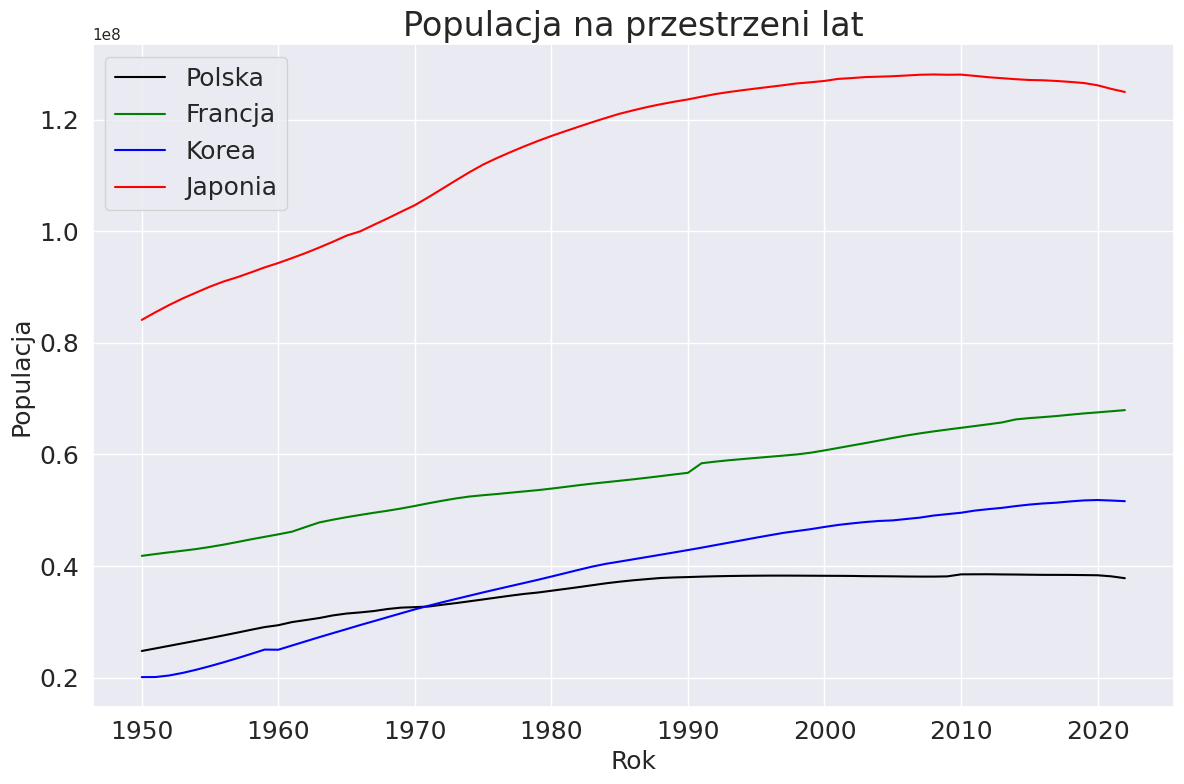

In [ ]:
# Wykres dotyczący porównania populacji na przestrzeni lat

plt.figure(figsize=(12, 8))

plt.plot(df_pl_pop.index, df_pl_pop['Population'], color='black', label='Polska')
plt.plot(df_fr_pop.index, df_fr_pop['Population'], color='green', label='Francja')
plt.plot(df_kr_pop.index, df_kr_pop['Population'], color='blue', label='Korea')
plt.plot(df_jp_pop.index, df_jp_pop['Population'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Populacja', fontsize = 18)
plt.title('Populacja na przestrzeni lat', fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

# Wskaźnik obciążenia demograficznego

## Całkowity wskaźnik obciążenia demograficznego

### Dane

In [ ]:
df_dep = pd.read_csv('https://drive.google.com/uc?id=1J5oWw4fYtC6-si9meXIJlP314bv8Kl0n')

In [ ]:
df_dep.head(3)

LOCATION Country SEX    Sex    AGE    Age  TIME  Time       Value  \
0      FRA  France   W  Women  TOTAL  Total  1950  1950  21723428.0   
1      FRA  France   W  Women  TOTAL  Total  1951  1951  21868473.0   
2      FRA  France   W  Women  TOTAL  Total  1952  1952  22005821.0   

   Flag Codes  Flags  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN

In [ ]:
df_dep.tail(10)

LOCATION Country SEX    Sex       AGE  \
11378      POL  Poland   T  Total  OAD20-64   
11379      POL  Poland   T  Total  OAD20-64   
11380      POL  Poland   T  Total  OAD20-64   
11381      POL  Poland   T  Total  OAD20-64   
11382      POL  Poland   T  Total  OAD20-64   
11383      POL  Poland   T  Total  OAD20-64   
11384      POL  Poland   T  Total  OAD20-64   
11385      POL  Poland   T  Total  OAD20-64   
11386      POL  Poland   T  Total  OAD20-64   
11387      POL  Poland   T  Total  OAD20-64   

                                                Age  TIME  Time      Value  \
11378  Old age dependency ratio (65 and over/20-64)  2013  2013  22.309900   
11379  Old age dependency ratio (65 and over/20-64)  2014  2014  23.214087   
11380  Old age dependency ratio (65 and over/20-64)  2015  2015  24.144714   
11381  Old age dependency ratio (65 and over/20-64)  2016  2016  25.220298   
11382  Old age dependency ratio (65 and over/20-64)  2017  2017  26.316426   
11383  Old age dependency ratio (65 and over/20-64)  2018  2018  27.458752   
11384  Old age dependency ratio (65 and over/20-64)  2019  2019  28.642283   
11385  Old age dependency ratio (65 and over/20-64)  2020  2020  29.891491   
11386  Old age dependency ratio (65 and over/20-64)  2021  2021  30.757200   
11387  Old age dependency ratio (65 and over/20-64)  2022  2022  31.671902   

       Flag Codes  Flags  
11378         NaN    NaN  
11379         NaN    NaN  
11380         NaN    NaN  
11381         NaN    NaN  
11382         NaN    NaN  
11383         NaN    NaN  
11384         NaN    NaN  
11385         NaN    NaN  
11386         NaN    NaN  
11387         NaN    NaN

In [ ]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11388 entries, 0 to 11387
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    11388 non-null  object 
 1   Country     11388 non-null  object 
 2   SEX         11388 non-null  object 
 3   Sex         11388 non-null  object 
 4   AGE         11388 non-null  object 
 5   Age         11388 non-null  object 
 6   TIME        11388 non-null  int64  
 7   Time        11388 non-null  int64  
 8   Value       11388 non-null  float64
 9   Flag Codes  0 non-null      float64
 10  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 978.8+ KB


In [ ]:
df_dep['Date'] = pd.to_datetime(df_dep['Time'], format='%Y')

In [ ]:
df_dep = df_dep[df_dep['AGE'] == 'TOTD20-64']

In [ ]:
df_dep = df_dep[df_dep['SEX'] == 'T']

In [ ]:
df_dep

LOCATION Country SEX    Sex        AGE  \
8030      FRA  France   T  Total  TOTD20-64   
8031      FRA  France   T  Total  TOTD20-64   
8032      FRA  France   T  Total  TOTD20-64   
8033      FRA  France   T  Total  TOTD20-64   
8034      FRA  France   T  Total  TOTD20-64   
...       ...     ...  ..    ...        ...   
8755      POL  Poland   T  Total  TOTD20-64   
8756      POL  Poland   T  Total  TOTD20-64   
8757      POL  Poland   T  Total  TOTD20-64   
8758      POL  Poland   T  Total  TOTD20-64   
8759      POL  Poland   T  Total  TOTD20-64   

                                               Age  TIME  Time      Value  \
8030  Total dependency ratio ((<20 & 65+) / 20-64)  1950  1950  71.189032   
8031  Total dependency ratio ((<20 & 65+) / 20-64)  1951  1951  71.641008   
8032  Total dependency ratio ((<20 & 65+) / 20-64)  1952  1952  72.117274   
8033  Total dependency ratio ((<20 & 65+) / 20-64)  1953  1953  72.689262   
8034  Total dependency ratio ((<20 & 65+) / 20-64)  1954  1954  73.337060   
...                                            ...   ...   ...        ...   
8755  Total dependency ratio ((<20 & 65+) / 20-64)  2018  2018  59.363288   
8756  Total dependency ratio ((<20 & 65+) / 20-64)  2019  2019  60.847290   
8757  Total dependency ratio ((<20 & 65+) / 20-64)  2020  2020  62.424109   
8758  Total dependency ratio ((<20 & 65+) / 20-64)  2021  2021  63.585279   
8759  Total dependency ratio ((<20 & 65+) / 20-64)  2022  2022  65.136266   

      Flag Codes  Flags       Date  
8030         NaN    NaN 1950-01-01  
8031         NaN    NaN 1951-01-01  
8032         NaN    NaN 1952-01-01  
8033         NaN    NaN 1953-01-01  
8034         NaN    NaN 1954-01-01  
...          ...    ...        ...  
8755         NaN    NaN 2018-01-01  
8756         NaN    NaN 2019-01-01  
8757         NaN    NaN 2020-01-01  
8758         NaN    NaN 2021-01-01  
8759         NaN    NaN 2022-01-01  

[292 rows x 12 columns]

In [ ]:
df_dep.rename(columns = {'Value': 'Dependency_Ratio'}, inplace=True)

#### Korea

In [ ]:
df_kr_dep = df_dep[df_dep['Country'] == 'Korea']

In [ ]:
df_kr_dep = df_kr_dep.loc[:, ['Date', 'Dependency_Ratio']]

In [ ]:
df_kr_dep

Date  Dependency_Ratio
8468 1950-01-01        122.431968
8469 1951-01-01        125.094998
8470 1952-01-01        126.693828
8471 1953-01-01        127.351483
8472 1954-01-01        127.543760
...         ...               ...
8536 2018-01-01         48.216255
8537 2019-01-01         48.145956
8538 2020-01-01         48.697122
8539 2021-01-01         49.189509
8540 2022-01-01         50.097365

[73 rows x 2 columns]

In [ ]:
df_kr_dep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_dep['Dependency_Ratio'] = df_kr_dep['Dependency_Ratio'].astype(float)

In [ ]:
df_kr_dep

Dependency_Ratio
Date                        
1950-01-01        122.431968
1951-01-01        125.094998
1952-01-01        126.693828
1953-01-01        127.351483
1954-01-01        127.543760
...                      ...
2018-01-01         48.216255
2019-01-01         48.145956
2020-01-01         48.697122
2021-01-01         49.189509
2022-01-01         50.097365

[73 rows x 1 columns]

#### Japonia

In [ ]:
df_jp_dep = df_dep[df_dep['Country'] == 'Japan']

In [ ]:
df_jp_dep = df_jp_dep.loc[:, ['Date', 'Dependency_Ratio']]

In [ ]:
df_jp_dep

Date  Dependency_Ratio
8249 1950-01-01        102.680365
8250 1951-01-01        101.328957
8251 1952-01-01         99.658730
8252 1953-01-01         97.569443
8253 1954-01-01         95.702140
...         ...               ...
8317 2018-01-01         81.342770
8318 2019-01-01         81.559812
8319 2020-01-01         81.815025
8320 2021-01-01         82.087787
8321 2022-01-01         81.884077

[73 rows x 2 columns]

In [ ]:
df_jp_dep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_dep['Dependency_Ratio'] = df_jp_dep['Dependency_Ratio'].astype(float)

In [ ]:
df_jp_dep

Dependency_Ratio
Date                        
1950-01-01        102.680365
1951-01-01        101.328957
1952-01-01         99.658730
1953-01-01         97.569443
1954-01-01         95.702140
...                      ...
2018-01-01         81.342770
2019-01-01         81.559812
2020-01-01         81.815025
2021-01-01         82.087787
2022-01-01         81.884077

[73 rows x 1 columns]

#### Francja

In [ ]:
df_fr_dep = df_dep[df_dep['Country'] == 'France']

In [ ]:
df_fr_dep = df_fr_dep.loc[:, ['Date', 'Dependency_Ratio']]

In [ ]:
df_fr_dep

Date  Dependency_Ratio
8030 1950-01-01         71.189032
8031 1951-01-01         71.641008
8032 1952-01-01         72.117274
8033 1953-01-01         72.689262
8034 1954-01-01         73.337060
...         ...               ...
8098 2018-01-01         78.948566
8099 2019-01-01         79.613955
8100 2020-01-01         80.086416
8101 2021-01-01         80.483081
8102 2022-01-01         80.936762

[73 rows x 2 columns]

In [ ]:
df_fr_dep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_dep['Dependency_Ratio'] = df_fr_dep['Dependency_Ratio'].astype(float)

In [ ]:
df_fr_dep

Dependency_Ratio
Date                        
1950-01-01         71.189032
1951-01-01         71.641008
1952-01-01         72.117274
1953-01-01         72.689262
1954-01-01         73.337060
...                      ...
2018-01-01         78.948566
2019-01-01         79.613955
2020-01-01         80.086416
2021-01-01         80.483081
2022-01-01         80.936762

[73 rows x 1 columns]

#### Polska

In [ ]:
df_pl_dep = df_dep[df_dep['Country'] == 'Poland']

In [ ]:
df_pl_dep = df_pl_dep.loc[:, ['Date', 'Dependency_Ratio']]

In [ ]:
df_pl_dep

Date  Dependency_Ratio
8687 1950-01-01         79.044634
8688 1951-01-01         79.151400
8689 1952-01-01         79.462781
8690 1953-01-01         79.841346
8691 1954-01-01         80.183276
...         ...               ...
8755 2018-01-01         59.363288
8756 2019-01-01         60.847290
8757 2020-01-01         62.424109
8758 2021-01-01         63.585279
8759 2022-01-01         65.136266

[73 rows x 2 columns]

In [ ]:
df_pl_dep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_dep['Dependency_Ratio'] = df_pl_dep['Dependency_Ratio'].astype(float)

In [ ]:
df_pl_dep

Dependency_Ratio
Date                        
1950-01-01         79.044634
1951-01-01         79.151400
1952-01-01         79.462781
1953-01-01         79.841346
1954-01-01         80.183276
...                      ...
2018-01-01         59.363288
2019-01-01         60.847290
2020-01-01         62.424109
2021-01-01         63.585279
2022-01-01         65.136266

[73 rows x 1 columns]

### Wykres

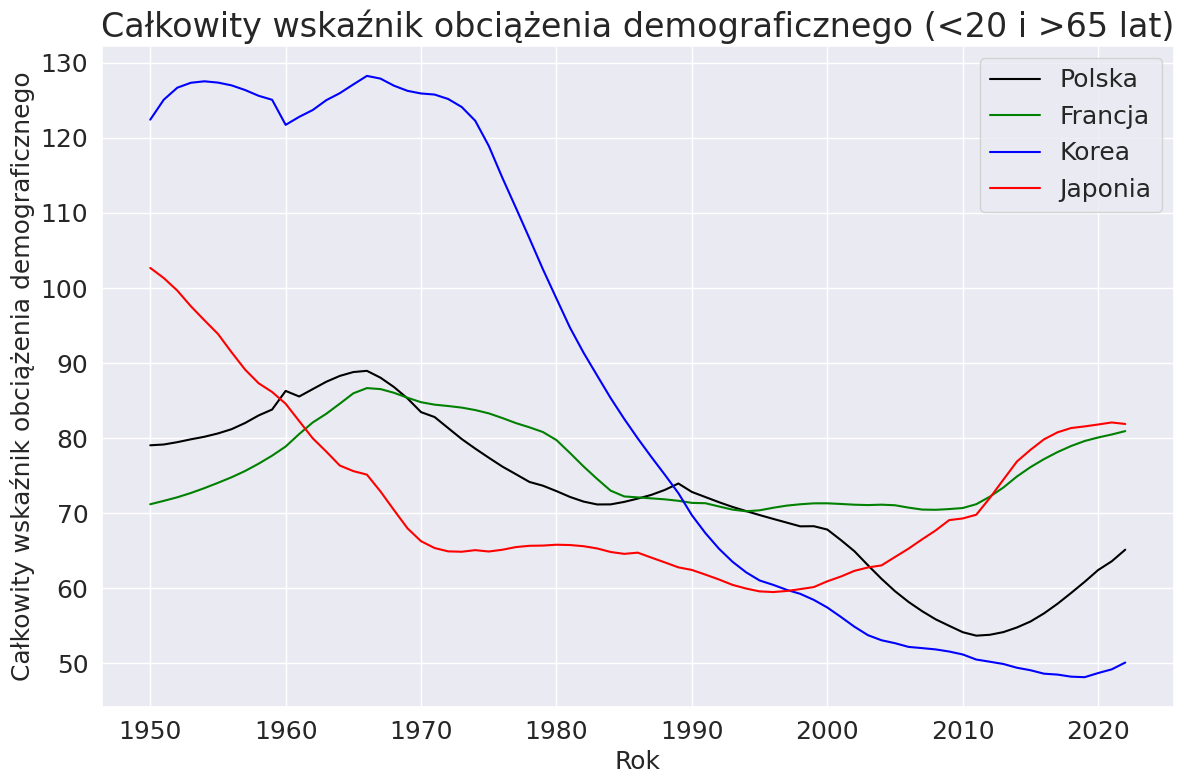

In [ ]:
# Wykres porównujący całkowity wskaźnik obciążenia demograficznego

plt.figure(figsize=(12, 8))

plt.plot(df_pl_dep.index, df_pl_dep['Dependency_Ratio'], color='black', label='Polska')
plt.plot(df_fr_dep.index, df_fr_dep['Dependency_Ratio'], color='green', label='Francja')
plt.plot(df_kr_dep.index, df_kr_dep['Dependency_Ratio'], color='blue', label='Korea')
plt.plot(df_jp_dep.index, df_jp_dep['Dependency_Ratio'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Całkowity wskaźnik obciążenia demograficznego', fontsize = 18)
plt.title('Całkowity wskaźnik obciążenia demograficznego (<20 i >65 lat)', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

## Wskaźnik obciążenia ludnością młodszą

### Dane

In [ ]:
df_ydep = pd.read_csv('https://drive.google.com/uc?id=1J5oWw4fYtC6-si9meXIJlP314bv8Kl0n')

In [ ]:
df_ydep.head(3)

LOCATION Country SEX    Sex    AGE    Age  TIME  Time       Value  \
0      FRA  France   W  Women  TOTAL  Total  1950  1950  21723428.0   
1      FRA  France   W  Women  TOTAL  Total  1951  1951  21868473.0   
2      FRA  France   W  Women  TOTAL  Total  1952  1952  22005821.0   

   Flag Codes  Flags  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN

In [ ]:
df_ydep.tail(10)

LOCATION Country SEX    Sex       AGE  \
11378      POL  Poland   T  Total  OAD20-64   
11379      POL  Poland   T  Total  OAD20-64   
11380      POL  Poland   T  Total  OAD20-64   
11381      POL  Poland   T  Total  OAD20-64   
11382      POL  Poland   T  Total  OAD20-64   
11383      POL  Poland   T  Total  OAD20-64   
11384      POL  Poland   T  Total  OAD20-64   
11385      POL  Poland   T  Total  OAD20-64   
11386      POL  Poland   T  Total  OAD20-64   
11387      POL  Poland   T  Total  OAD20-64   

                                                Age  TIME  Time      Value  \
11378  Old age dependency ratio (65 and over/20-64)  2013  2013  22.309900   
11379  Old age dependency ratio (65 and over/20-64)  2014  2014  23.214087   
11380  Old age dependency ratio (65 and over/20-64)  2015  2015  24.144714   
11381  Old age dependency ratio (65 and over/20-64)  2016  2016  25.220298   
11382  Old age dependency ratio (65 and over/20-64)  2017  2017  26.316426   
11383  Old age dependency ratio (65 and over/20-64)  2018  2018  27.458752   
11384  Old age dependency ratio (65 and over/20-64)  2019  2019  28.642283   
11385  Old age dependency ratio (65 and over/20-64)  2020  2020  29.891491   
11386  Old age dependency ratio (65 and over/20-64)  2021  2021  30.757200   
11387  Old age dependency ratio (65 and over/20-64)  2022  2022  31.671902   

       Flag Codes  Flags  
11378         NaN    NaN  
11379         NaN    NaN  
11380         NaN    NaN  
11381         NaN    NaN  
11382         NaN    NaN  
11383         NaN    NaN  
11384         NaN    NaN  
11385         NaN    NaN  
11386         NaN    NaN  
11387         NaN    NaN

In [ ]:
df_ydep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11388 entries, 0 to 11387
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    11388 non-null  object 
 1   Country     11388 non-null  object 
 2   SEX         11388 non-null  object 
 3   Sex         11388 non-null  object 
 4   AGE         11388 non-null  object 
 5   Age         11388 non-null  object 
 6   TIME        11388 non-null  int64  
 7   Time        11388 non-null  int64  
 8   Value       11388 non-null  float64
 9   Flag Codes  0 non-null      float64
 10  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 978.8+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_ydep['Date'] = pd.to_datetime(df_ydep['Time'], format='%Y')

In [ ]:
df_ydep = df_ydep[df_ydep['AGE'] == 'YD_L20']

In [ ]:
df_ydep = df_ydep[df_ydep['SEX'] == 'T']

In [ ]:
df_ydep

LOCATION Country SEX    Sex     AGE  \
9782       FRA  France   T  Total  YD_L20   
9783       FRA  France   T  Total  YD_L20   
9784       FRA  France   T  Total  YD_L20   
9785       FRA  France   T  Total  YD_L20   
9786       FRA  France   T  Total  YD_L20   
...        ...     ...  ..    ...     ...   
10507      POL  Poland   T  Total  YD_L20   
10508      POL  Poland   T  Total  YD_L20   
10509      POL  Poland   T  Total  YD_L20   
10510      POL  Poland   T  Total  YD_L20   
10511      POL  Poland   T  Total  YD_L20   

                                          Age  TIME  Time      Value  \
9782   Young age dependency ratio (<20/20-64)  1950  1950  51.702264   
9783   Young age dependency ratio (<20/20-64)  1951  1951  52.044355   
9784   Young age dependency ratio (<20/20-64)  1952  1952  52.402674   
9785   Young age dependency ratio (<20/20-64)  1953  1953  52.845940   
9786   Young age dependency ratio (<20/20-64)  1954  1954  53.358686   
...                                       ...   ...   ...        ...   
10507  Young age dependency ratio (<20/20-64)  2018  2018  31.904537   
10508  Young age dependency ratio (<20/20-64)  2019  2019  32.205007   
10509  Young age dependency ratio (<20/20-64)  2020  2020  32.532618   
10510  Young age dependency ratio (<20/20-64)  2021  2021  32.828079   
10511  Young age dependency ratio (<20/20-64)  2022  2022  33.464365   

       Flag Codes  Flags       Date  
9782          NaN    NaN 1950-01-01  
9783          NaN    NaN 1951-01-01  
9784          NaN    NaN 1952-01-01  
9785          NaN    NaN 1953-01-01  
9786          NaN    NaN 1954-01-01  
...           ...    ...        ...  
10507         NaN    NaN 2018-01-01  
10508         NaN    NaN 2019-01-01  
10509         NaN    NaN 2020-01-01  
10510         NaN    NaN 2021-01-01  
10511         NaN    NaN 2022-01-01  

[292 rows x 12 columns]

In [ ]:
df_ydep.rename(columns = {'Value': 'Young_Age_Dependency_Ratio'}, inplace=True)

#### Korea

In [ ]:
df_kr_ydep = df_ydep[df_ydep['Country'] == 'Korea']

In [ ]:
df_kr_ydep = df_kr_ydep.loc[:, ['Date', 'Young_Age_Dependency_Ratio']]

In [ ]:
df_kr_ydep

Date  Young_Age_Dependency_Ratio
10220 1950-01-01                  116.329753
10221 1951-01-01                  118.971255
10222 1952-01-01                  120.432699
10223 1953-01-01                  120.895878
10224 1954-01-01                  120.887891
...          ...                         ...
10288 2018-01-01                   27.051725
10289 2019-01-01                   26.140792
10290 2020-01-01                   25.312726
10291 2021-01-01                   24.476820
10292 2022-01-01                   23.878321

[73 rows x 2 columns]

In [ ]:
df_kr_ydep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_ydep['Young_Age_Dependency_Ratio'] = df_kr_ydep['Young_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_kr_ydep

Young_Age_Dependency_Ratio
Date                                  
1950-01-01                  116.329753
1951-01-01                  118.971255
1952-01-01                  120.432699
1953-01-01                  120.895878
1954-01-01                  120.887891
...                                ...
2018-01-01                   27.051725
2019-01-01                   26.140792
2020-01-01                   25.312726
2021-01-01                   24.476820
2022-01-01                   23.878321

[73 rows x 1 columns]

#### Japonia

In [ ]:
df_jp_ydep = df_ydep[df_ydep['Country'] == 'Japan']

In [ ]:
df_jp_ydep = df_jp_ydep.loc[:, ['Date', 'Young_Age_Dependency_Ratio']]

In [ ]:
df_jp_ydep

Date  Young_Age_Dependency_Ratio
10001 1950-01-01                   92.667291
10002 1951-01-01                   91.381069
10003 1952-01-01                   89.649443
10004 1953-01-01                   87.520884
10005 1954-01-01                   85.516900
...          ...                         ...
10069 2018-01-01                   30.581613
10070 2019-01-01                   30.265390
10071 2020-01-01                   29.889654
10072 2021-01-01                   29.545540
10073 2022-01-01                   29.135629

[73 rows x 2 columns]

In [ ]:
df_jp_ydep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_ydep['Young_Age_Dependency_Ratio'] = df_jp_ydep['Young_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_jp_ydep

Young_Age_Dependency_Ratio
Date                                  
1950-01-01                   92.667291
1951-01-01                   91.381069
1952-01-01                   89.649443
1953-01-01                   87.520884
1954-01-01                   85.516900
...                                ...
2018-01-01                   30.581613
2019-01-01                   30.265390
2020-01-01                   29.889654
2021-01-01                   29.545540
2022-01-01                   29.135629

[73 rows x 1 columns]

#### Francja

In [ ]:
df_fr_ydep = df_ydep[df_ydep['Country'] == 'France']

In [ ]:
df_fr_ydep = df_fr_ydep.loc[:, ['Date', 'Young_Age_Dependency_Ratio']]

In [ ]:
df_fr_ydep

Date  Young_Age_Dependency_Ratio
9782 1950-01-01                   51.702264
9783 1951-01-01                   52.044355
9784 1952-01-01                   52.402674
9785 1953-01-01                   52.845940
9786 1954-01-01                   53.358686
...         ...                         ...
9850 2018-01-01                   43.453950
9851 2019-01-01                   43.336911
9852 2020-01-01                   43.130253
9853 2021-01-01                   42.919115
9854 2022-01-01                   42.741503

[73 rows x 2 columns]

In [ ]:
df_fr_ydep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_ydep['Young_Age_Dependency_Ratio'] = df_fr_ydep['Young_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_fr_ydep

Young_Age_Dependency_Ratio
Date                                  
1950-01-01                   51.702264
1951-01-01                   52.044355
1952-01-01                   52.402674
1953-01-01                   52.845940
1954-01-01                   53.358686
...                                ...
2018-01-01                   43.453950
2019-01-01                   43.336911
2020-01-01                   43.130253
2021-01-01                   42.919115
2022-01-01                   42.741503

[73 rows x 1 columns]

#### Polska

In [ ]:
df_pl_ydep = df_ydep[df_ydep['Country'] == 'Poland']

In [ ]:
df_pl_ydep = df_pl_ydep.loc[:, ['Date', 'Young_Age_Dependency_Ratio']]

In [ ]:
df_pl_ydep

Date  Young_Age_Dependency_Ratio
10439 1950-01-01                   69.692275
10440 1951-01-01                   69.769310
10441 1952-01-01                   70.005590
10442 1953-01-01                   70.289568
10443 1954-01-01                   70.590298
...          ...                         ...
10507 2018-01-01                   31.904537
10508 2019-01-01                   32.205007
10509 2020-01-01                   32.532618
10510 2021-01-01                   32.828079
10511 2022-01-01                   33.464365

[73 rows x 2 columns]

In [ ]:
df_pl_ydep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_ydep['Young_Age_Dependency_Ratio'] = df_pl_ydep['Young_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_pl_ydep

Young_Age_Dependency_Ratio
Date                                  
1950-01-01                   69.692275
1951-01-01                   69.769310
1952-01-01                   70.005590
1953-01-01                   70.289568
1954-01-01                   70.590298
...                                ...
2018-01-01                   31.904537
2019-01-01                   32.205007
2020-01-01                   32.532618
2021-01-01                   32.828079
2022-01-01                   33.464365

[73 rows x 1 columns]

### Wykres

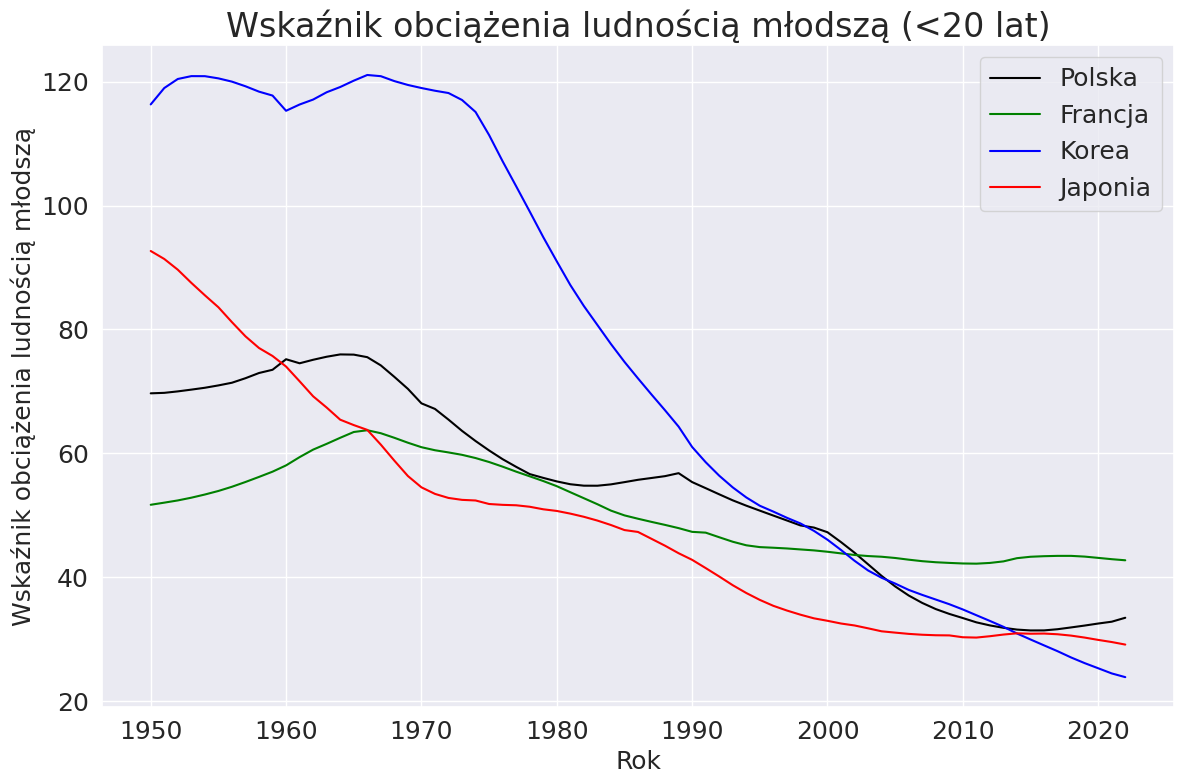

In [ ]:
# Wykres porównujący wskaźniki obciążenia ludnością młodszą (powyżej 20 lat)

plt.figure(figsize=(12, 8))

plt.plot(df_pl_ydep.index, df_pl_ydep['Young_Age_Dependency_Ratio'], color='black', label='Polska')
plt.plot(df_fr_ydep.index, df_fr_ydep['Young_Age_Dependency_Ratio'], color='green', label='Francja')
plt.plot(df_kr_ydep.index, df_kr_ydep['Young_Age_Dependency_Ratio'], color='blue', label='Korea')
plt.plot(df_jp_ydep.index, df_jp_ydep['Young_Age_Dependency_Ratio'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Wskaźnik obciążenia ludnością młodszą', fontsize = 18)
plt.title('Wskaźnik obciążenia ludnością młodszą (<20 lat)', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

## Wskaźnik obciążenia ludnością starszą

### Dane

In [ ]:
df_odep = pd.read_csv('https://drive.google.com/uc?id=1J5oWw4fYtC6-si9meXIJlP314bv8Kl0n')

In [ ]:
df_odep.head(3)

LOCATION Country SEX    Sex    AGE    Age  TIME  Time       Value  \
0      FRA  France   W  Women  TOTAL  Total  1950  1950  21723428.0   
1      FRA  France   W  Women  TOTAL  Total  1951  1951  21868473.0   
2      FRA  France   W  Women  TOTAL  Total  1952  1952  22005821.0   

   Flag Codes  Flags  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN

In [ ]:
df_odep.tail(10)

LOCATION Country SEX    Sex       AGE  \
11378      POL  Poland   T  Total  OAD20-64   
11379      POL  Poland   T  Total  OAD20-64   
11380      POL  Poland   T  Total  OAD20-64   
11381      POL  Poland   T  Total  OAD20-64   
11382      POL  Poland   T  Total  OAD20-64   
11383      POL  Poland   T  Total  OAD20-64   
11384      POL  Poland   T  Total  OAD20-64   
11385      POL  Poland   T  Total  OAD20-64   
11386      POL  Poland   T  Total  OAD20-64   
11387      POL  Poland   T  Total  OAD20-64   

                                                Age  TIME  Time      Value  \
11378  Old age dependency ratio (65 and over/20-64)  2013  2013  22.309900   
11379  Old age dependency ratio (65 and over/20-64)  2014  2014  23.214087   
11380  Old age dependency ratio (65 and over/20-64)  2015  2015  24.144714   
11381  Old age dependency ratio (65 and over/20-64)  2016  2016  25.220298   
11382  Old age dependency ratio (65 and over/20-64)  2017  2017  26.316426   
11383  Old age dependency ratio (65 and over/20-64)  2018  2018  27.458752   
11384  Old age dependency ratio (65 and over/20-64)  2019  2019  28.642283   
11385  Old age dependency ratio (65 and over/20-64)  2020  2020  29.891491   
11386  Old age dependency ratio (65 and over/20-64)  2021  2021  30.757200   
11387  Old age dependency ratio (65 and over/20-64)  2022  2022  31.671902   

       Flag Codes  Flags  
11378         NaN    NaN  
11379         NaN    NaN  
11380         NaN    NaN  
11381         NaN    NaN  
11382         NaN    NaN  
11383         NaN    NaN  
11384         NaN    NaN  
11385         NaN    NaN  
11386         NaN    NaN  
11387         NaN    NaN

In [ ]:
df_odep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11388 entries, 0 to 11387
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    11388 non-null  object 
 1   Country     11388 non-null  object 
 2   SEX         11388 non-null  object 
 3   Sex         11388 non-null  object 
 4   AGE         11388 non-null  object 
 5   Age         11388 non-null  object 
 6   TIME        11388 non-null  int64  
 7   Time        11388 non-null  int64  
 8   Value       11388 non-null  float64
 9   Flag Codes  0 non-null      float64
 10  Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(6)
memory usage: 978.8+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_odep['Date'] = pd.to_datetime(df_odep['Time'], format='%Y')

In [ ]:
df_odep = df_odep[df_odep['AGE'] == 'OAD20-64']

In [ ]:
df_odep = df_odep[df_odep['SEX'] == 'T']

In [ ]:
df_odep

LOCATION Country SEX    Sex       AGE  \
10658      FRA  France   T  Total  OAD20-64   
10659      FRA  France   T  Total  OAD20-64   
10660      FRA  France   T  Total  OAD20-64   
10661      FRA  France   T  Total  OAD20-64   
10662      FRA  France   T  Total  OAD20-64   
...        ...     ...  ..    ...       ...   
11383      POL  Poland   T  Total  OAD20-64   
11384      POL  Poland   T  Total  OAD20-64   
11385      POL  Poland   T  Total  OAD20-64   
11386      POL  Poland   T  Total  OAD20-64   
11387      POL  Poland   T  Total  OAD20-64   

                                                Age  TIME  Time      Value  \
10658  Old age dependency ratio (65 and over/20-64)  1950  1950  19.486767   
10659  Old age dependency ratio (65 and over/20-64)  1951  1951  19.596653   
10660  Old age dependency ratio (65 and over/20-64)  1952  1952  19.714599   
10661  Old age dependency ratio (65 and over/20-64)  1953  1953  19.843322   
10662  Old age dependency ratio (65 and over/20-64)  1954  1954  19.978374   
...                                             ...   ...   ...        ...   
11383  Old age dependency ratio (65 and over/20-64)  2018  2018  27.458752   
11384  Old age dependency ratio (65 and over/20-64)  2019  2019  28.642283   
11385  Old age dependency ratio (65 and over/20-64)  2020  2020  29.891491   
11386  Old age dependency ratio (65 and over/20-64)  2021  2021  30.757200   
11387  Old age dependency ratio (65 and over/20-64)  2022  2022  31.671902   

       Flag Codes  Flags       Date  
10658         NaN    NaN 1950-01-01  
10659         NaN    NaN 1951-01-01  
10660         NaN    NaN 1952-01-01  
10661         NaN    NaN 1953-01-01  
10662         NaN    NaN 1954-01-01  
...           ...    ...        ...  
11383         NaN    NaN 2018-01-01  
11384         NaN    NaN 2019-01-01  
11385         NaN    NaN 2020-01-01  
11386         NaN    NaN 2021-01-01  
11387         NaN    NaN 2022-01-01  

[292 rows x 12 columns]

In [ ]:
df_odep.rename(columns = {'Value': 'Old_Age_Dependency_Ratio'}, inplace=True)

#### Korea

In [ ]:
df_kr_odep = df_odep[df_odep['Country'] == 'Korea']

In [ ]:
df_kr_odep = df_kr_odep.loc[:, ['Date', 'Old_Age_Dependency_Ratio']]

In [ ]:
df_kr_odep

Date  Old_Age_Dependency_Ratio
11096 1950-01-01                  6.102215
11097 1951-01-01                  6.123742
11098 1952-01-01                  6.261129
11099 1953-01-01                  6.455605
11100 1954-01-01                  6.655868
...          ...                       ...
11164 2018-01-01                 21.164531
11165 2019-01-01                 22.005163
11166 2020-01-01                 23.384396
11167 2021-01-01                 24.712689
11168 2022-01-01                 26.219044

[73 rows x 2 columns]

In [ ]:
df_kr_odep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_odep['Old_Age_Dependency_Ratio'] = df_kr_odep['Old_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_kr_odep

Old_Age_Dependency_Ratio
Date                                
1950-01-01                  6.102215
1951-01-01                  6.123742
1952-01-01                  6.261129
1953-01-01                  6.455605
1954-01-01                  6.655868
...                              ...
2018-01-01                 21.164531
2019-01-01                 22.005163
2020-01-01                 23.384396
2021-01-01                 24.712689
2022-01-01                 26.219044

[73 rows x 1 columns]

#### Japonia

In [ ]:
df_jp_odep = df_odep[df_odep['Country'] == 'Japan']

In [ ]:
df_jp_odep = df_jp_odep.loc[:, ['Date', 'Old_Age_Dependency_Ratio']]

In [ ]:
df_jp_odep

Date  Old_Age_Dependency_Ratio
10877 1950-01-01                 10.013074
10878 1951-01-01                  9.947889
10879 1952-01-01                 10.009287
10880 1953-01-01                 10.048558
10881 1954-01-01                 10.185240
...          ...                       ...
10945 2018-01-01                 50.761156
10946 2019-01-01                 51.294422
10947 2020-01-01                 51.925371
10948 2021-01-01                 52.542247
10949 2022-01-01                 52.748448

[73 rows x 2 columns]

In [ ]:
df_jp_odep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_odep['Old_Age_Dependency_Ratio'] = df_jp_odep['Old_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_jp_odep

Old_Age_Dependency_Ratio
Date                                
1950-01-01                 10.013074
1951-01-01                  9.947889
1952-01-01                 10.009287
1953-01-01                 10.048558
1954-01-01                 10.185240
...                              ...
2018-01-01                 50.761156
2019-01-01                 51.294422
2020-01-01                 51.925371
2021-01-01                 52.542247
2022-01-01                 52.748448

[73 rows x 1 columns]

#### Francja

In [ ]:
df_fr_odep = df_odep[df_odep['Country'] == 'France']

In [ ]:
df_fr_odep = df_fr_odep.loc[:, ['Date', 'Old_Age_Dependency_Ratio']]

In [ ]:
df_fr_odep

Date  Old_Age_Dependency_Ratio
10658 1950-01-01                 19.486767
10659 1951-01-01                 19.596653
10660 1952-01-01                 19.714599
10661 1953-01-01                 19.843322
10662 1954-01-01                 19.978374
...          ...                       ...
10726 2018-01-01                 35.494617
10727 2019-01-01                 36.277045
10728 2020-01-01                 36.956163
10729 2021-01-01                 37.563966
10730 2022-01-01                 38.195258

[73 rows x 2 columns]

In [ ]:
df_fr_odep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_odep['Old_Age_Dependency_Ratio'] = df_fr_odep['Old_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_fr_odep

Old_Age_Dependency_Ratio
Date                                
1950-01-01                 19.486767
1951-01-01                 19.596653
1952-01-01                 19.714599
1953-01-01                 19.843322
1954-01-01                 19.978374
...                              ...
2018-01-01                 35.494617
2019-01-01                 36.277045
2020-01-01                 36.956163
2021-01-01                 37.563966
2022-01-01                 38.195258

[73 rows x 1 columns]

#### Polska

In [ ]:
df_pl_odep = df_odep[df_odep['Country'] == 'Poland']

In [ ]:
df_pl_odep = df_pl_odep.loc[:, ['Date', 'Old_Age_Dependency_Ratio']]

In [ ]:
df_pl_odep

Date  Old_Age_Dependency_Ratio
11315 1950-01-01                  9.352359
11316 1951-01-01                  9.382090
11317 1952-01-01                  9.457190
11318 1953-01-01                  9.551778
11319 1954-01-01                  9.592978
...          ...                       ...
11383 2018-01-01                 27.458752
11384 2019-01-01                 28.642283
11385 2020-01-01                 29.891491
11386 2021-01-01                 30.757200
11387 2022-01-01                 31.671902

[73 rows x 2 columns]

In [ ]:
df_pl_odep.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_odep['Old_Age_Dependency_Ratio'] = df_pl_odep['Old_Age_Dependency_Ratio'].astype(float)

In [ ]:
df_pl_odep

Old_Age_Dependency_Ratio
Date                                
1950-01-01                  9.352359
1951-01-01                  9.382090
1952-01-01                  9.457190
1953-01-01                  9.551778
1954-01-01                  9.592978
...                              ...
2018-01-01                 27.458752
2019-01-01                 28.642283
2020-01-01                 29.891491
2021-01-01                 30.757200
2022-01-01                 31.671902

[73 rows x 1 columns]

### Wykres

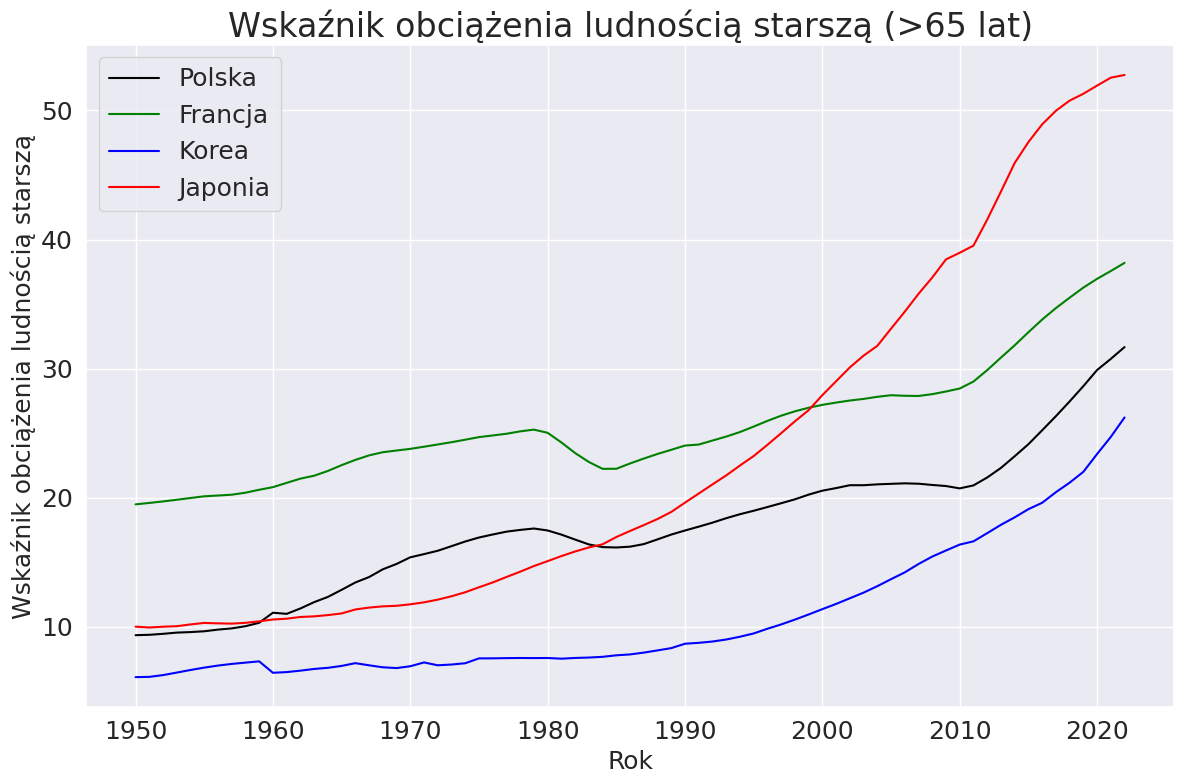

In [ ]:
# Wykres porównujący wskaźniki obciążenia ludnością starszą

plt.figure(figsize=(12, 8))

plt.plot(df_pl_odep.index, df_pl_odep['Old_Age_Dependency_Ratio'], color='black', label='Polska')
plt.plot(df_fr_odep.index, df_fr_odep['Old_Age_Dependency_Ratio'], color='green', label='Francja')
plt.plot(df_kr_odep.index, df_kr_odep['Old_Age_Dependency_Ratio'], color='blue', label='Korea')
plt.plot(df_jp_odep.index, df_jp_odep['Old_Age_Dependency_Ratio'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Wskaźnik obciążenia ludnością starszą', fontsize = 18)
plt.title('Wskaźnik obciążenia ludnością starszą (>65 lat)', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

# Współczynnik dzietności

## Dane

In [ ]:
df_fert = pd.read_csv('https://drive.google.com/uc?id=1OYPnB9XCgUkPOsxtucSVSP5qxfKlkzUP')

In [ ]:
df_fert.head(3)

Series Name     Series Code    Year Year Code  \
0  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1960.0    YR1960   
1  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1961.0    YR1961   
2  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1962.0    YR1962   

   Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]  
0              5.949         2.00          2.85          2.98  
1              5.810         1.96          2.87          2.83  
2              5.624         1.98          2.89          2.72

In [ ]:
df_fert.tail(10)

Series Name     Series Code    Year  \
58           Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2018.0   
59           Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2019.0   
60           Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2020.0   
61           Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2021.0   
62           Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2022.0   
63                                                NaN             NaN     NaN   
64                                                NaN             NaN     NaN   
65                                                NaN             NaN     NaN   
66  Data from database: Health Nutrition and Popul...             NaN     NaN   
67                           Last Updated: 05/31/2024             NaN     NaN   

   Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]  
58    YR2018              0.977         1.42         1.870         1.460  
59    YR2019              0.918         1.36         1.860         1.440  
60    YR2020              0.837         1.33         1.830         1.390  
61    YR2021              0.808         1.30         1.840         1.330  
62    YR2022              0.778         1.26         1.794         1.261  
63       NaN                NaN          NaN           NaN           NaN  
64       NaN                NaN          NaN           NaN           NaN  
65       NaN                NaN          NaN           NaN           NaN  
66       NaN                NaN          NaN           NaN           NaN  
67       NaN                NaN          NaN           NaN           NaN

In [ ]:
df_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series Name        65 non-null     object 
 1   Series Code        63 non-null     object 
 2   Year               63 non-null     float64
 3   Year Code          63 non-null     object 
 4   Korea, Rep. [KOR]  63 non-null     float64
 5   Japan [JPN]        63 non-null     float64
 6   France [FRA]       63 non-null     float64
 7   Poland [POL]       63 non-null     float64
dtypes: float64(5), object(3)
memory usage: 4.4+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_fert['Date'] = pd.to_datetime(df_fert['Year'], format='%Y')

In [ ]:
df_fert = df_fert[df_fert['Series Code'] == 'SP.DYN.TFRT.IN']

In [ ]:
df_fert

Series Name     Series Code    Year  \
0   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1960.0   
1   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1961.0   
2   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1962.0   
3   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1963.0   
4   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1964.0   
..                                       ...             ...     ...   
58  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2018.0   
59  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2019.0   
60  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2020.0   
61  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2021.0   
62  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2022.0   

   Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]  \
0     YR1960              5.949         2.00         2.850         2.980   
1     YR1961              5.810         1.96         2.870         2.830   
2     YR1962              5.624         1.98         2.890         2.720   
3     YR1963              5.407         2.00         2.890         2.700   
4     YR1964              5.188         2.05         2.870         2.570   
..       ...                ...          ...           ...           ...   
58    YR2018              0.977         1.42         1.870         1.460   
59    YR2019              0.918         1.36         1.860         1.440   
60    YR2020              0.837         1.33         1.830         1.390   
61    YR2021              0.808         1.30         1.840         1.330   
62    YR2022              0.778         1.26         1.794         1.261   

         Date  
0  1960-01-01  
1  1961-01-01  
2  1962-01-01  
3  1963-01-01  
4  1964-01-01  
..        ...  
58 2018-01-01  
59 2019-01-01  
60 2020-01-01  
61 2021-01-01  
62 2022-01-01  

[63 rows x 9 columns]

### Korea

In [ ]:
df_kr_fert = df_fert.loc[:, ['Date', 'Korea, Rep. [KOR]']]

In [ ]:
df_kr_fert

Date  Korea, Rep. [KOR]
0  1960-01-01              5.949
1  1961-01-01              5.810
2  1962-01-01              5.624
3  1963-01-01              5.407
4  1964-01-01              5.188
..        ...                ...
58 2018-01-01              0.977
59 2019-01-01              0.918
60 2020-01-01              0.837
61 2021-01-01              0.808
62 2022-01-01              0.778

[63 rows x 2 columns]

In [ ]:
df_kr_fert.rename(columns = {'Korea, Rep. [KOR]': 'Fertility_Rate'}, inplace=True)

In [ ]:
df_kr_fert.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_fert['Fertility_Rate'] = df_kr_fert['Fertility_Rate'].astype(float)

In [ ]:
new_date = pd.to_datetime('2023-01-01')
df_kr_fert.loc[new_date] = 0.72

In [ ]:
df_kr_fert

Fertility_Rate
Date                      
1960-01-01           5.949
1961-01-01           5.810
1962-01-01           5.624
1963-01-01           5.407
1964-01-01           5.188
...                    ...
2019-01-01           0.918
2020-01-01           0.837
2021-01-01           0.808
2022-01-01           0.778
2023-01-01           0.720

[64 rows x 1 columns]

### Japonia

In [ ]:
df_jp_fert = df_fert.loc[:, ['Date', 'Japan [JPN]']]

In [ ]:
df_jp_fert

Date  Japan [JPN]
0  1960-01-01         2.00
1  1961-01-01         1.96
2  1962-01-01         1.98
3  1963-01-01         2.00
4  1964-01-01         2.05
..        ...          ...
58 2018-01-01         1.42
59 2019-01-01         1.36
60 2020-01-01         1.33
61 2021-01-01         1.30
62 2022-01-01         1.26

[63 rows x 2 columns]

In [ ]:
df_jp_fert.rename(columns = {'Japan [JPN]': 'Fertility_Rate'}, inplace=True)

In [ ]:
df_jp_fert.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_fert['Fertility_Rate'] = df_jp_fert['Fertility_Rate'].astype(float)

In [ ]:
df_jp_fert

Fertility_Rate
Date                      
1960-01-01            2.00
1961-01-01            1.96
1962-01-01            1.98
1963-01-01            2.00
1964-01-01            2.05
...                    ...
2018-01-01            1.42
2019-01-01            1.36
2020-01-01            1.33
2021-01-01            1.30
2022-01-01            1.26

[63 rows x 1 columns]

### Francja

In [ ]:
df_fr_fert = df_fert.loc[:, ['Date', 'France [FRA]']]

In [ ]:
df_fr_fert

Date  France [FRA]
0  1960-01-01         2.850
1  1961-01-01         2.870
2  1962-01-01         2.890
3  1963-01-01         2.890
4  1964-01-01         2.870
..        ...           ...
58 2018-01-01         1.870
59 2019-01-01         1.860
60 2020-01-01         1.830
61 2021-01-01         1.840
62 2022-01-01         1.794

[63 rows x 2 columns]

In [ ]:
df_fr_fert.rename(columns = {'France [FRA]': 'Fertility_Rate'}, inplace=True)

In [ ]:
df_fr_fert.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_fert['Fertility_Rate'] = df_fr_fert['Fertility_Rate'].astype(float)

In [ ]:
df_fr_fert

Fertility_Rate
Date                      
1960-01-01           2.850
1961-01-01           2.870
1962-01-01           2.890
1963-01-01           2.890
1964-01-01           2.870
...                    ...
2018-01-01           1.870
2019-01-01           1.860
2020-01-01           1.830
2021-01-01           1.840
2022-01-01           1.794

[63 rows x 1 columns]

### Polska

In [ ]:
df_pl_fert = df_fert.loc[:, ['Date', 'Poland [POL]']]

In [ ]:
df_pl_fert

Date  Poland [POL]
0  1960-01-01         2.980
1  1961-01-01         2.830
2  1962-01-01         2.720
3  1963-01-01         2.700
4  1964-01-01         2.570
..        ...           ...
58 2018-01-01         1.460
59 2019-01-01         1.440
60 2020-01-01         1.390
61 2021-01-01         1.330
62 2022-01-01         1.261

[63 rows x 2 columns]

In [ ]:
df_pl_fert.rename(columns = {'Poland [POL]': 'Fertility_Rate'}, inplace=True)

In [ ]:
df_pl_fert.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_fert['Fertility_Rate'] = df_pl_fert['Fertility_Rate'].astype(float)

In [ ]:
new_date = pd.to_datetime('2023-01-01')
df_pl_fert.loc[new_date] = 1.467

In [ ]:
df_pl_fert

Fertility_Rate
Date                      
1960-01-01           2.980
1961-01-01           2.830
1962-01-01           2.720
1963-01-01           2.700
1964-01-01           2.570
...                    ...
2019-01-01           1.440
2020-01-01           1.390
2021-01-01           1.330
2022-01-01           1.261
2023-01-01           1.467

[64 rows x 1 columns]

## Wykres

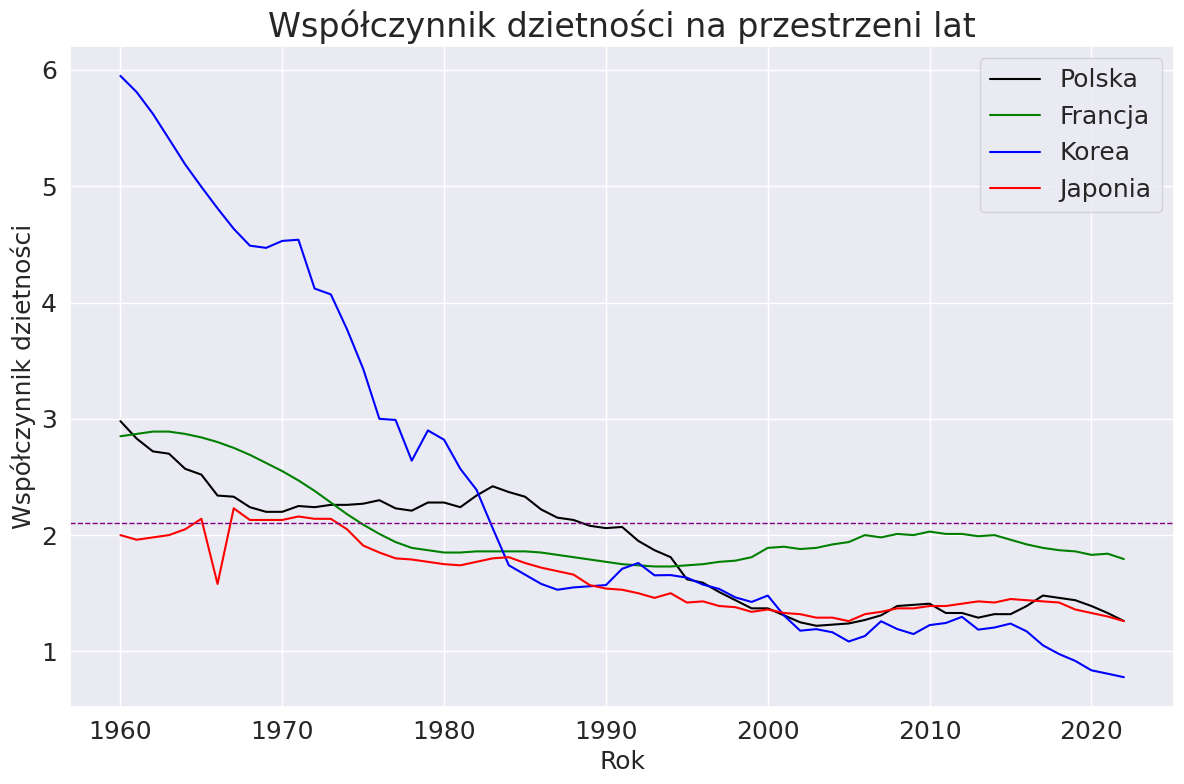

In [ ]:
# Porównanie współczynnika dzietności między krajami

plt.figure(figsize=(12, 8))

plt.plot(df_pl_fert.index, df_pl_fert['Fertility_Rate'], color='black', label='Polska')
plt.plot(df_fr_fert.index, df_fr_fert['Fertility_Rate'], color='green', label='Francja')
plt.plot(df_kr_fert.index, df_kr_fert['Fertility_Rate'], color='blue', label='Korea')
plt.plot(df_jp_fert.index, df_jp_fert['Fertility_Rate'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Współczynnik dzietności', fontsize = 18)
plt.title('Współczynnik dzietności na przestrzeni lat', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y=2.1, color='purple', linestyle='--', linewidth=1)
plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

# Wzrost liczby ludności

## Dane

In [ ]:
df_grow = pd.read_csv('https://drive.google.com/uc?id=1SYkOax_SPWxGgryitOvQTLEgAtcEBEuU')

In [ ]:
df_grow.head(3)

Series Name  Series Code    Year Year Code  \
0  Population growth (annual %)  SP.POP.GROW  1960.0    YR1960   
1  Population growth (annual %)  SP.POP.GROW  1961.0    YR1961   
2  Population growth (annual %)  SP.POP.GROW  1962.0    YR1962   

  Korea, Rep. [KOR]        Japan [JPN]      France [FRA]      Poland [POL]  
0                ..                 ..                ..                ..  
1  2.96724397295283   0.89603367679599   1.0909509053906  1.09578967474124  
2  2.85932081160452  0.929166208260758  1.09267888300245  1.14315401418553

In [ ]:
df_grow.tail(10)

Series Name  Series Code    Year  \
58                       Population growth (annual %)  SP.POP.GROW  2018.0   
59                       Population growth (annual %)  SP.POP.GROW  2019.0   
60                       Population growth (annual %)  SP.POP.GROW  2020.0   
61                       Population growth (annual %)  SP.POP.GROW  2021.0   
62                       Population growth (annual %)  SP.POP.GROW  2022.0   
63                                                NaN          NaN     NaN   
64                                                NaN          NaN     NaN   
65                                                NaN          NaN     NaN   
66  Data from database: Health Nutrition and Popul...          NaN     NaN   
67                           Last Updated: 05/31/2024          NaN     NaN   

   Year Code   Korea, Rep. [KOR]         Japan [JPN]       France [FRA]  \
58    YR2018   0.433519027613049  -0.126880068088791  0.358494581816163   
59    YR2019   0.347874968577526  -0.140464977878172  0.341374143157509   
60    YR2020   0.137869266247028  -0.294194617750067  0.271350507669993   
61    YR2021  -0.176408650734229  -0.459952415807642  0.285508618638434   
62    YR2022  -0.225898556795999  -0.443851919148528  0.305015246719983   
63       NaN                 NaN                 NaN                NaN   
64       NaN                 NaN                 NaN                NaN   
65       NaN                 NaN                 NaN                NaN   
66       NaN                 NaN                 NaN                NaN   
67       NaN                 NaN                 NaN                NaN   

             Poland [POL]  
58  -0.000200132782838419  
59    -0.0244271070993493  
60     -0.175062058196296  
61     -0.401728616642455  
62      -2.48206113275772  
63                    NaN  
64                    NaN  
65                    NaN  
66                    NaN  
67                    NaN

In [ ]:
df_grow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series Name        65 non-null     object 
 1   Series Code        63 non-null     object 
 2   Year               63 non-null     float64
 3   Year Code          63 non-null     object 
 4   Korea, Rep. [KOR]  63 non-null     object 
 5   Japan [JPN]        63 non-null     object 
 6   France [FRA]       63 non-null     object 
 7   Poland [POL]       63 non-null     object 
dtypes: float64(1), object(7)
memory usage: 4.4+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_grow['Date'] = pd.to_datetime(df_grow['Year'], format='%Y')

In [ ]:
df_grow = df_grow[df_grow['Series Code'] == 'SP.POP.GROW']

In [ ]:
df_grow

Series Name  Series Code    Year Year Code  \
0   Population growth (annual %)  SP.POP.GROW  1960.0    YR1960   
1   Population growth (annual %)  SP.POP.GROW  1961.0    YR1961   
2   Population growth (annual %)  SP.POP.GROW  1962.0    YR1962   
3   Population growth (annual %)  SP.POP.GROW  1963.0    YR1963   
4   Population growth (annual %)  SP.POP.GROW  1964.0    YR1964   
..                           ...          ...     ...       ...   
58  Population growth (annual %)  SP.POP.GROW  2018.0    YR2018   
59  Population growth (annual %)  SP.POP.GROW  2019.0    YR2019   
60  Population growth (annual %)  SP.POP.GROW  2020.0    YR2020   
61  Population growth (annual %)  SP.POP.GROW  2021.0    YR2021   
62  Population growth (annual %)  SP.POP.GROW  2022.0    YR2022   

     Korea, Rep. [KOR]         Japan [JPN]       France [FRA]  \
0                   ..                  ..                 ..   
1     2.96724397295283    0.89603367679599    1.0909509053906   
2     2.85932081160452   0.929166208260758   1.09267888300245   
3     2.78482005271866     1.0134602261801   1.06426044971838   
4     2.61539463516021    1.04044962804068   1.12266120572376   
..                 ...                 ...                ...   
58   0.433519027613049  -0.126880068088791  0.358494581816163   
59   0.347874968577526  -0.140464977878172  0.341374143157509   
60   0.137869266247028  -0.294194617750067  0.271350507669993   
61  -0.176408650734229  -0.459952415807642  0.285508618638434   
62  -0.225898556795999  -0.443851919148528  0.305015246719983   

             Poland [POL]       Date  
0                      .. 1960-01-01  
1        1.09578967474124 1961-01-01  
2        1.14315401418553 1962-01-01  
3        1.32252564710048 1963-01-01  
4        1.38220463805364 1964-01-01  
..                    ...        ...  
58  -0.000200132782838419 2018-01-01  
59    -0.0244271070993493 2019-01-01  
60     -0.175062058196296 2020-01-01  
61     -0.401728616642455 2021-01-01  
62      -2.48206113275772 2022-01-01  

[63 rows x 9 columns]

In [ ]:
df_grow = df_grow.iloc[1:,:]

### Korea

In [ ]:
df_kr_grow = df_grow.loc[:, ['Date', 'Korea, Rep. [KOR]']]

In [ ]:
df_kr_grow

Date   Korea, Rep. [KOR]
1  1961-01-01    2.96724397295283
2  1962-01-01    2.85932081160452
3  1963-01-01    2.78482005271866
4  1964-01-01    2.61539463516021
5  1965-01-01    2.54215095083813
..        ...                 ...
58 2018-01-01   0.433519027613049
59 2019-01-01   0.347874968577526
60 2020-01-01   0.137869266247028
61 2021-01-01  -0.176408650734229
62 2022-01-01  -0.225898556795999

[62 rows x 2 columns]

In [ ]:
df_kr_grow.rename(columns = {'Korea, Rep. [KOR]': 'Population_Growth'}, inplace=True)

In [ ]:
df_kr_grow.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_grow['Population_Growth'] = df_kr_grow['Population_Growth'].astype(float).round(2)

In [ ]:
df_kr_grow

Population_Growth
Date                         
1961-01-01               2.97
1962-01-01               2.86
1963-01-01               2.78
1964-01-01               2.62
1965-01-01               2.54
...                       ...
2018-01-01               0.43
2019-01-01               0.35
2020-01-01               0.14
2021-01-01              -0.18
2022-01-01              -0.23

[62 rows x 1 columns]

### Japonia

In [ ]:
df_jp_grow = df_grow.loc[:, ['Date', 'Japan [JPN]']]

In [ ]:
df_jp_grow

Date         Japan [JPN]
1  1961-01-01    0.89603367679599
2  1962-01-01   0.929166208260758
3  1963-01-01     1.0134602261801
4  1964-01-01    1.04044962804068
5  1965-01-01    1.07670845932027
..        ...                 ...
58 2018-01-01  -0.126880068088791
59 2019-01-01  -0.140464977878172
60 2020-01-01  -0.294194617750067
61 2021-01-01  -0.459952415807642
62 2022-01-01  -0.443851919148528

[62 rows x 2 columns]

In [ ]:
df_jp_grow.rename(columns = {'Japan [JPN]': 'Population_Growth'}, inplace=True)

In [ ]:
df_jp_grow.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_grow['Population_Growth'] = df_jp_grow['Population_Growth'].astype(float).round(2)

In [ ]:
df_jp_grow

Population_Growth
Date                         
1961-01-01               0.90
1962-01-01               0.93
1963-01-01               1.01
1964-01-01               1.04
1965-01-01               1.08
...                       ...
2018-01-01              -0.13
2019-01-01              -0.14
2020-01-01              -0.29
2021-01-01              -0.46
2022-01-01              -0.44

[62 rows x 1 columns]

### Francja

In [ ]:
df_fr_grow = df_grow.loc[:, ['Date', 'France [FRA]']]

In [ ]:
df_fr_grow

Date       France [FRA]
1  1961-01-01    1.0909509053906
2  1962-01-01   1.09267888300245
3  1963-01-01   1.06426044971838
4  1964-01-01   1.12266120572376
5  1965-01-01    1.1197366100284
..        ...                ...
58 2018-01-01  0.358494581816163
59 2019-01-01  0.341374143157509
60 2020-01-01  0.271350507669993
61 2021-01-01  0.285508618638434
62 2022-01-01  0.305015246719983

[62 rows x 2 columns]

In [ ]:
df_fr_grow.rename(columns = {'France [FRA]': 'Population_Growth'}, inplace=True)

In [ ]:
df_fr_grow.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_grow['Population_Growth'] = df_fr_grow['Population_Growth'].astype(float).round(2)

In [ ]:
df_fr_grow

Population_Growth
Date                         
1961-01-01               1.09
1962-01-01               1.09
1963-01-01               1.06
1964-01-01               1.12
1965-01-01               1.12
...                       ...
2018-01-01               0.36
2019-01-01               0.34
2020-01-01               0.27
2021-01-01               0.29
2022-01-01               0.31

[62 rows x 1 columns]

### Polska

In [ ]:
df_pl_grow = df_grow.loc[:, ['Date', 'Poland [POL]']]

In [ ]:
df_pl_grow

Date           Poland [POL]
1  1961-01-01       1.09578967474124
2  1962-01-01       1.14315401418553
3  1963-01-01       1.32252564710048
4  1964-01-01       1.38220463805364
5  1965-01-01      0.976289383725576
..        ...                    ...
58 2018-01-01  -0.000200132782838419
59 2019-01-01    -0.0244271070993493
60 2020-01-01     -0.175062058196296
61 2021-01-01     -0.401728616642455
62 2022-01-01      -2.48206113275772

[62 rows x 2 columns]

In [ ]:
df_pl_grow.rename(columns = {'Poland [POL]': 'Population_Growth'}, inplace=True)

In [ ]:
df_pl_grow.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_grow['Population_Growth'] = df_pl_grow['Population_Growth'].astype(float).round(2)

In [ ]:
df_pl_grow

Population_Growth
Date                         
1961-01-01               1.10
1962-01-01               1.14
1963-01-01               1.32
1964-01-01               1.38
1965-01-01               0.98
...                       ...
2018-01-01              -0.00
2019-01-01              -0.02
2020-01-01              -0.18
2021-01-01              -0.40
2022-01-01              -2.48

[62 rows x 1 columns]

## Wykres

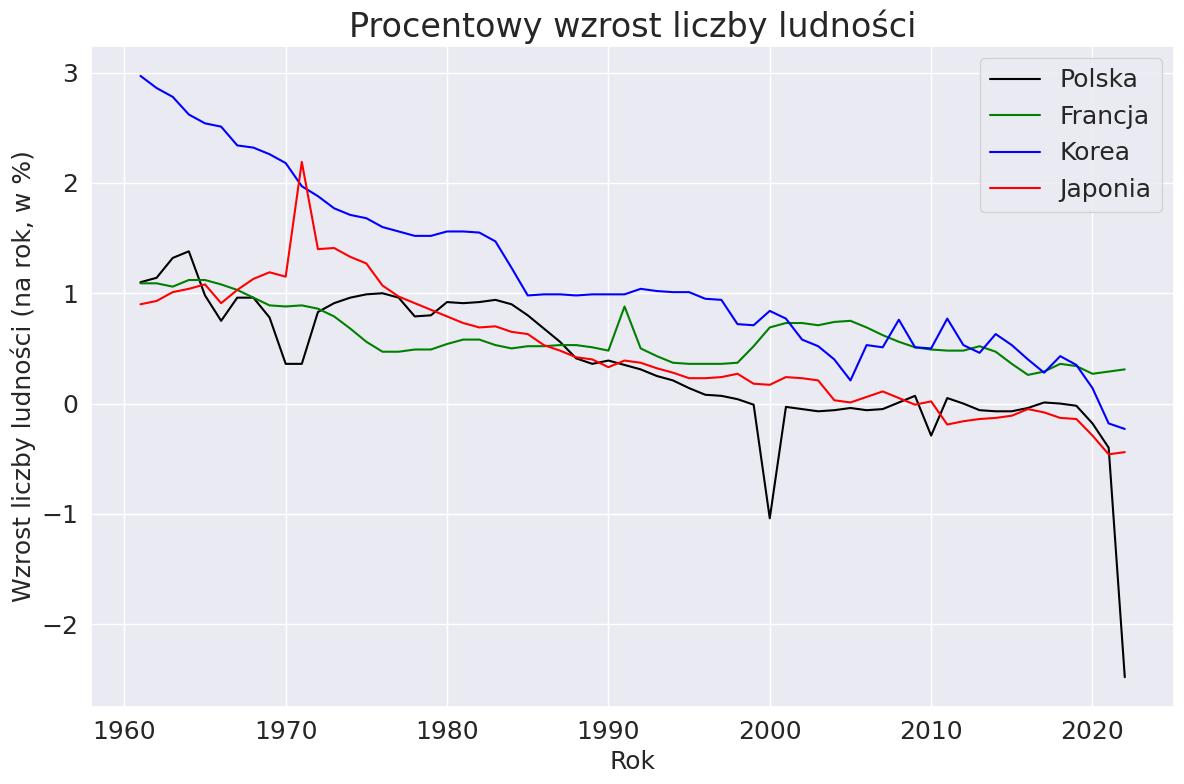

In [ ]:
# Porównanie procentowego wskaźnika wzrostu liczby ludności

plt.figure(figsize=(12, 8))

plt.plot(df_pl_grow.index, df_pl_grow['Population_Growth'], color='black', label='Polska')
plt.plot(df_fr_grow.index, df_fr_grow['Population_Growth'], color='green', label='Francja')
plt.plot(df_kr_grow.index, df_kr_grow['Population_Growth'], color='blue', label='Korea')
plt.plot(df_jp_grow.index, df_jp_grow['Population_Growth'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Wzrost liczby ludności (na rok, w %)', fontsize = 18)
plt.title('Procentowy wzrost liczby ludności', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

# Ludność w wieku 65 lat i więcej (% całkowitej populacji)

## Dane

In [ ]:
df_pop_65 = pd.read_csv('https://drive.google.com/uc?id=19DaWoenDuW2DlNUDHiK4bggM8RQAa1PZ')

In [ ]:
df_pop_65.head(3)

Series Name        Series Code  \
0  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
1  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   

     Year Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  \
0  1960.0    YR1960           3.304110     5.799270     11.668856   
1  1961.0    YR1961           3.334077     5.912462     11.744786   
2  1962.0    YR1962           3.343948     6.024575     11.853745   

   Poland [POL]  
0      5.766612  
1      5.965445  
2      6.166182

In [ ]:
df_pop_65.tail(10)

Series Name        Series Code  \
58  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
59  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
60  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
61  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
62  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
63                                                NaN                NaN   
64                                                NaN                NaN   
65                                                NaN                NaN   
66  Data from database: Health Nutrition and Popul...                NaN   
67                           Last Updated: 05/31/2024                NaN   

      Year Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  \
58  2018.0    YR2018          14.453285    28.901654     20.310231   
59  2019.0    YR2019          15.065692    29.279814     20.676325   
60  2020.0    YR2020          15.829069    29.583178     21.009548   
61  2021.0    YR2021          16.650765    29.787090     21.323255   
62  2022.0    YR2022          17.491136    29.924561     21.658420   
63     NaN       NaN                NaN          NaN           NaN   
64     NaN       NaN                NaN          NaN           NaN   
65     NaN       NaN                NaN          NaN           NaN   
66     NaN       NaN                NaN          NaN           NaN   
67     NaN       NaN                NaN          NaN           NaN   

    Poland [POL]  
58     17.257738  
59     17.832811  
60     18.374040  
61     18.836263  
62     18.554563  
63           NaN  
64           NaN  
65           NaN  
66           NaN  
67           NaN

In [ ]:
df_pop_65.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series Name        65 non-null     object 
 1   Series Code        63 non-null     object 
 2   Year               63 non-null     float64
 3   Year Code          63 non-null     object 
 4   Korea, Rep. [KOR]  63 non-null     float64
 5   Japan [JPN]        63 non-null     float64
 6   France [FRA]       63 non-null     float64
 7   Poland [POL]       63 non-null     float64
dtypes: float64(5), object(3)
memory usage: 4.4+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_pop_65['Date'] = pd.to_datetime(df_pop_65['Year'], format='%Y')

In [ ]:
df_pop_65 = df_pop_65[df_pop_65['Series Code'] == 'SP.POP.65UP.TO.ZS']

In [ ]:
df_pop_65

Series Name        Series Code  \
0   Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
1   Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
2   Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3   Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
4   Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
..                                                ...                ...   
58  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
59  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
60  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
61  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
62  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   

      Year Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  \
0   1960.0    YR1960           3.304110     5.799270     11.668856   
1   1961.0    YR1961           3.334077     5.912462     11.744786   
2   1962.0    YR1962           3.343948     6.024575     11.853745   
3   1963.0    YR1963           3.339503     6.151433     11.927473   
4   1964.0    YR1964           3.314515     6.288638     12.035364   
..     ...       ...                ...          ...           ...   
58  2018.0    YR2018          14.453285    28.901654     20.310231   
59  2019.0    YR2019          15.065692    29.279814     20.676325   
60  2020.0    YR2020          15.829069    29.583178     21.009548   
61  2021.0    YR2021          16.650765    29.787090     21.323255   
62  2022.0    YR2022          17.491136    29.924561     21.658420   

    Poland [POL]       Date  
0       5.766612 1960-01-01  
1       5.965445 1961-01-01  
2       6.166182 1962-01-01  
3       6.376219 1963-01-01  
4       6.585500 1964-01-01  
..           ...        ...  
58     17.257738 2018-01-01  
59     17.832811 2019-01-01  
60     18.374040 2020-01-01  
61     18.836263 2021-01-01  
62     18.554563 2022-01-01  

[63 rows x 9 columns]

### Korea

In [ ]:
df_kr_pop_65 = df_pop_65.loc[:, ['Date', 'Korea, Rep. [KOR]']]

In [ ]:
df_kr_pop_65

Date  Korea, Rep. [KOR]
0  1960-01-01           3.304110
1  1961-01-01           3.334077
2  1962-01-01           3.343948
3  1963-01-01           3.339503
4  1964-01-01           3.314515
..        ...                ...
58 2018-01-01          14.453285
59 2019-01-01          15.065692
60 2020-01-01          15.829069
61 2021-01-01          16.650765
62 2022-01-01          17.491136

[63 rows x 2 columns]

In [ ]:
df_kr_pop_65.rename(columns = {'Korea, Rep. [KOR]': 'Population_Age_65_Plus'}, inplace=True)

In [ ]:
df_kr_pop_65.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_pop_65['Population_Age_65_Plus'] = df_kr_pop_65['Population_Age_65_Plus'].astype(float).round(2)

In [ ]:
df_kr_pop_65

Population_Age_65_Plus
Date                              
1960-01-01                    3.30
1961-01-01                    3.33
1962-01-01                    3.34
1963-01-01                    3.34
1964-01-01                    3.31
...                            ...
2018-01-01                   14.45
2019-01-01                   15.07
2020-01-01                   15.83
2021-01-01                   16.65
2022-01-01                   17.49

[63 rows x 1 columns]

### Japonia

In [ ]:
df_jp_pop_65 = df_pop_65.loc[:, ['Date', 'Japan [JPN]']]

In [ ]:
df_jp_pop_65

Date  Japan [JPN]
0  1960-01-01     5.799270
1  1961-01-01     5.912462
2  1962-01-01     6.024575
3  1963-01-01     6.151433
4  1964-01-01     6.288638
..        ...          ...
58 2018-01-01    28.901654
59 2019-01-01    29.279814
60 2020-01-01    29.583178
61 2021-01-01    29.787090
62 2022-01-01    29.924561

[63 rows x 2 columns]

In [ ]:
df_jp_pop_65.rename(columns = {'Japan [JPN]': 'Population_Age_65_Plus'}, inplace=True)

In [ ]:
df_jp_pop_65.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_pop_65['Population_Age_65_Plus'] = df_jp_pop_65['Population_Age_65_Plus'].astype(float).round(2)

In [ ]:
df_jp_pop_65

Population_Age_65_Plus
Date                              
1960-01-01                    5.80
1961-01-01                    5.91
1962-01-01                    6.02
1963-01-01                    6.15
1964-01-01                    6.29
...                            ...
2018-01-01                   28.90
2019-01-01                   29.28
2020-01-01                   29.58
2021-01-01                   29.79
2022-01-01                   29.92

[63 rows x 1 columns]

### Francja

In [ ]:
df_fr_pop_65 = df_pop_65.loc[:, ['Date', 'France [FRA]']]

In [ ]:
df_fr_pop_65

Date  France [FRA]
0  1960-01-01     11.668856
1  1961-01-01     11.744786
2  1962-01-01     11.853745
3  1963-01-01     11.927473
4  1964-01-01     12.035364
..        ...           ...
58 2018-01-01     20.310231
59 2019-01-01     20.676325
60 2020-01-01     21.009548
61 2021-01-01     21.323255
62 2022-01-01     21.658420

[63 rows x 2 columns]

In [ ]:
df_fr_pop_65.rename(columns = {'France [FRA]': 'Population_Age_65_Plus'}, inplace=True)

In [ ]:
df_fr_pop_65.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_pop_65['Population_Age_65_Plus'] = df_fr_pop_65['Population_Age_65_Plus'].astype(float).round(2)

In [ ]:
df_fr_pop_65

Population_Age_65_Plus
Date                              
1960-01-01                   11.67
1961-01-01                   11.74
1962-01-01                   11.85
1963-01-01                   11.93
1964-01-01                   12.04
...                            ...
2018-01-01                   20.31
2019-01-01                   20.68
2020-01-01                   21.01
2021-01-01                   21.32
2022-01-01                   21.66

[63 rows x 1 columns]

### Polska

In [ ]:
df_pl_pop_65 = df_pop_65.loc[:, ['Date', 'Poland [POL]']]

In [ ]:
df_pl_pop_65

Date  Poland [POL]
0  1960-01-01      5.766612
1  1961-01-01      5.965445
2  1962-01-01      6.166182
3  1963-01-01      6.376219
4  1964-01-01      6.585500
..        ...           ...
58 2018-01-01     17.257738
59 2019-01-01     17.832811
60 2020-01-01     18.374040
61 2021-01-01     18.836263
62 2022-01-01     18.554563

[63 rows x 2 columns]

In [ ]:
df_pl_pop_65.rename(columns = {'Poland [POL]': 'Population_Age_65_Plus'}, inplace=True)

In [ ]:
df_pl_pop_65.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_pop_65['Population_Age_65_Plus'] = df_pl_pop_65['Population_Age_65_Plus'].astype(float).round(2)

In [ ]:
df_pl_pop_65

Population_Age_65_Plus
Date                              
1960-01-01                    5.77
1961-01-01                    5.97
1962-01-01                    6.17
1963-01-01                    6.38
1964-01-01                    6.59
...                            ...
2018-01-01                   17.26
2019-01-01                   17.83
2020-01-01                   18.37
2021-01-01                   18.84
2022-01-01                   18.55

[63 rows x 1 columns]

## Wykres

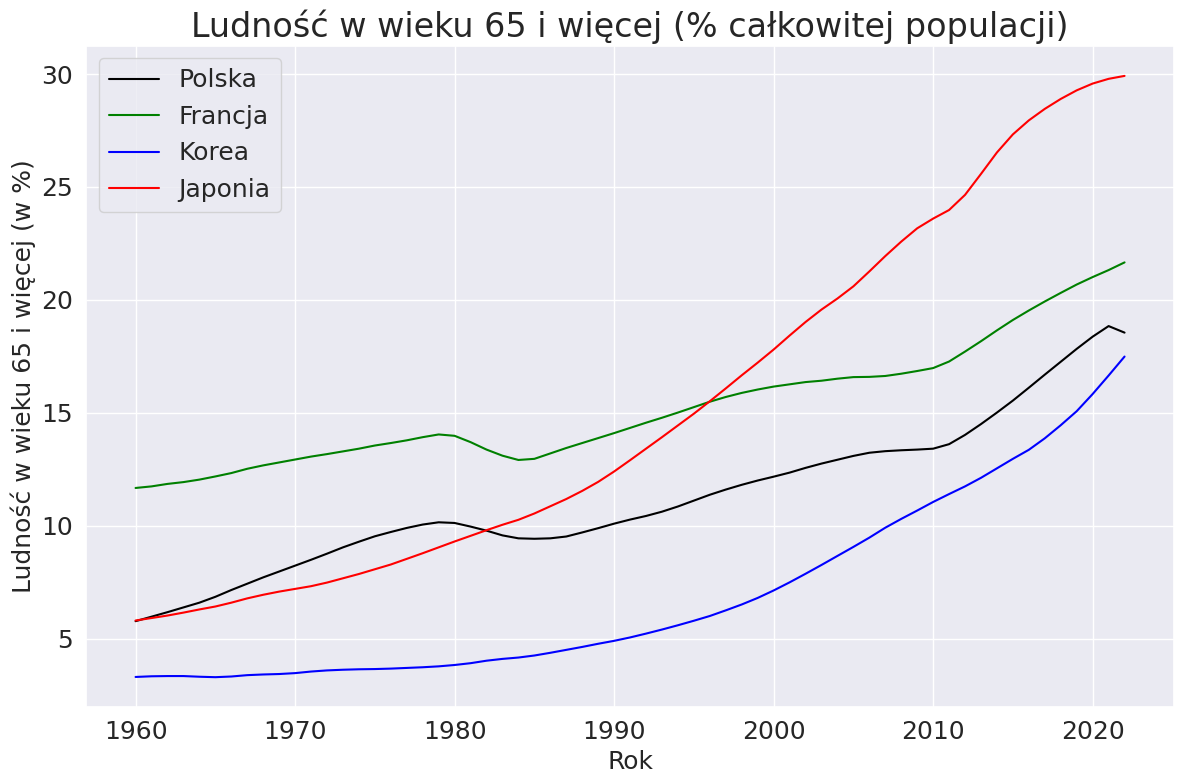

In [ ]:
# Porównanie wskaźnika ludności w wieku 65 lat i więcej jako procent całości populacji

plt.figure(figsize=(12, 8))

plt.plot(df_pl_pop_65.index, df_pl_pop_65['Population_Age_65_Plus'], color='black', label='Polska')
plt.plot(df_fr_pop_65.index, df_fr_pop_65['Population_Age_65_Plus'], color='green', label='Francja')
plt.plot(df_kr_pop_65.index, df_kr_pop_65['Population_Age_65_Plus'], color='blue', label='Korea')
plt.plot(df_jp_pop_65.index, df_jp_pop_65['Population_Age_65_Plus'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Ludność w wieku 65 i więcej (w %)', fontsize = 18)
plt.title('Ludność w wieku 65 i więcej (% całkowitej populacji)', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

# Oczekiwana długość życia (przy urodzeniu)

## Dane

In [ ]:
df_life_ex = pd.read_csv('https://drive.google.com/uc?id=1BL4rgRs_hLc5OQrYWIpy-557BoOVPHEo')

In [ ]:
df_life_ex.head(3)

Series Name     Series Code    Year Year Code  \
0  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1960.0    YR1960   
1  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1961.0    YR1961   
2  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1962.0    YR1962   

   Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]  
0          54.320244    67.695610     69.868293     67.680488  
1          54.924000    68.351951     70.117073     67.778049  
2          55.519512    68.634878     70.314634     67.426829

In [ ]:
df_life_ex.tail(10)

Series Name     Series Code    Year  \
58            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2018.0   
59            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2019.0   
60            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2020.0   
61            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2021.0   
62            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2022.0   
63                                                NaN             NaN     NaN   
64                                                NaN             NaN     NaN   
65                                                NaN             NaN     NaN   
66  Data from database: Health Nutrition and Popul...             NaN     NaN   
67                           Last Updated: 05/31/2024             NaN     NaN   

   Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]  
58    YR2018          82.626829    84.210976     82.675610     77.602439  
59    YR2019          83.226829    84.356341     82.826829     77.904878  
60    YR2020          83.426829    84.560000     82.175610     76.500000  
61    YR2021          83.526829    84.445610     82.324390     75.502439  
62    YR2022          82.680488    83.996341     82.229268     77.304878  
63       NaN                NaN          NaN           NaN           NaN  
64       NaN                NaN          NaN           NaN           NaN  
65       NaN                NaN          NaN           NaN           NaN  
66       NaN                NaN          NaN           NaN           NaN  
67       NaN                NaN          NaN           NaN           NaN

In [ ]:
df_life_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series Name        65 non-null     object 
 1   Series Code        63 non-null     object 
 2   Year               63 non-null     float64
 3   Year Code          63 non-null     object 
 4   Korea, Rep. [KOR]  63 non-null     float64
 5   Japan [JPN]        63 non-null     float64
 6   France [FRA]       63 non-null     float64
 7   Poland [POL]       63 non-null     float64
dtypes: float64(5), object(3)
memory usage: 4.4+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_life_ex['Date'] = pd.to_datetime(df_life_ex['Year'], format='%Y')

In [ ]:
df_life_ex = df_life_ex[df_life_ex['Series Code'] == 'SP.DYN.LE00.IN']

In [ ]:
df_life_ex

Series Name     Series Code    Year Year Code  \
0   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1960.0    YR1960   
1   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1961.0    YR1961   
2   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1962.0    YR1962   
3   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1963.0    YR1963   
4   Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1964.0    YR1964   
..                                      ...             ...     ...       ...   
58  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2018.0    YR2018   
59  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2019.0    YR2019   
60  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2020.0    YR2020   
61  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2021.0    YR2021   
62  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  2022.0    YR2022   

    Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]       Date  
0           54.320244    67.695610     69.868293     67.680488 1960-01-01  
1           54.924000    68.351951     70.117073     67.778049 1961-01-01  
2           55.519512    68.634878     70.314634     67.426829 1962-01-01  
3           55.974878    69.712439     70.514634     68.375610 1963-01-01  
4           57.174780    70.206585     70.663415     68.629268 1964-01-01  
..                ...          ...           ...           ...        ...  
58          82.626829    84.210976     82.675610     77.602439 2018-01-01  
59          83.226829    84.356341     82.826829     77.904878 2019-01-01  
60          83.426829    84.560000     82.175610     76.500000 2020-01-01  
61          83.526829    84.445610     82.324390     75.502439 2021-01-01  
62          82.680488    83.996341     82.229268     77.304878 2022-01-01  

[63 rows x 9 columns]

### Korea

In [ ]:
df_kr_life_ex = df_life_ex.loc[:, ['Date', 'Korea, Rep. [KOR]']]

In [ ]:
df_kr_life_ex

Date  Korea, Rep. [KOR]
0  1960-01-01          54.320244
1  1961-01-01          54.924000
2  1962-01-01          55.519512
3  1963-01-01          55.974878
4  1964-01-01          57.174780
..        ...                ...
58 2018-01-01          82.626829
59 2019-01-01          83.226829
60 2020-01-01          83.426829
61 2021-01-01          83.526829
62 2022-01-01          82.680488

[63 rows x 2 columns]

In [ ]:
df_kr_life_ex.rename(columns = {'Korea, Rep. [KOR]': 'Life_Expectancy'}, inplace=True)

In [ ]:
df_kr_life_ex.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_life_ex['Life_Expectancy'] = df_kr_life_ex['Life_Expectancy'].astype(float).round(2)

In [ ]:
df_kr_life_ex

Life_Expectancy
Date                       
1960-01-01            54.32
1961-01-01            54.92
1962-01-01            55.52
1963-01-01            55.97
1964-01-01            57.17
...                     ...
2018-01-01            82.63
2019-01-01            83.23
2020-01-01            83.43
2021-01-01            83.53
2022-01-01            82.68

[63 rows x 1 columns]

### Japonia

In [ ]:
df_jp_life_ex = df_life_ex.loc[:, ['Date', 'Japan [JPN]']]

In [ ]:
df_jp_life_ex

Date  Japan [JPN]
0  1960-01-01    67.695610
1  1961-01-01    68.351951
2  1962-01-01    68.634878
3  1963-01-01    69.712439
4  1964-01-01    70.206585
..        ...          ...
58 2018-01-01    84.210976
59 2019-01-01    84.356341
60 2020-01-01    84.560000
61 2021-01-01    84.445610
62 2022-01-01    83.996341

[63 rows x 2 columns]

In [ ]:
df_jp_life_ex.rename(columns = {'Japan [JPN]': 'Life_Expectancy'}, inplace=True)

In [ ]:
df_jp_life_ex.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_life_ex['Life_Expectancy'] = df_jp_life_ex['Life_Expectancy'].astype(float).round(2)

In [ ]:
df_jp_life_ex

Life_Expectancy
Date                       
1960-01-01            67.70
1961-01-01            68.35
1962-01-01            68.63
1963-01-01            69.71
1964-01-01            70.21
...                     ...
2018-01-01            84.21
2019-01-01            84.36
2020-01-01            84.56
2021-01-01            84.45
2022-01-01            84.00

[63 rows x 1 columns]

### Francja

In [ ]:
df_fr_life_ex = df_life_ex.loc[:, ['Date', 'France [FRA]']]

In [ ]:
df_fr_life_ex

Date  France [FRA]
0  1960-01-01     69.868293
1  1961-01-01     70.117073
2  1962-01-01     70.314634
3  1963-01-01     70.514634
4  1964-01-01     70.663415
..        ...           ...
58 2018-01-01     82.675610
59 2019-01-01     82.826829
60 2020-01-01     82.175610
61 2021-01-01     82.324390
62 2022-01-01     82.229268

[63 rows x 2 columns]

In [ ]:
df_fr_life_ex.rename(columns = {'France [FRA]': 'Life_Expectancy'}, inplace=True)

In [ ]:
df_fr_life_ex.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_life_ex['Life_Expectancy'] = df_fr_life_ex['Life_Expectancy'].astype(float).round(2)

In [ ]:
df_fr_life_ex

Life_Expectancy
Date                       
1960-01-01            69.87
1961-01-01            70.12
1962-01-01            70.31
1963-01-01            70.51
1964-01-01            70.66
...                     ...
2018-01-01            82.68
2019-01-01            82.83
2020-01-01            82.18
2021-01-01            82.32
2022-01-01            82.23

[63 rows x 1 columns]

### Polska

In [ ]:
df_pl_life_ex = df_life_ex.loc[:, ['Date', 'Poland [POL]']]

In [ ]:
df_pl_life_ex

Date  Poland [POL]
0  1960-01-01     67.680488
1  1961-01-01     67.778049
2  1962-01-01     67.426829
3  1963-01-01     68.375610
4  1964-01-01     68.629268
..        ...           ...
58 2018-01-01     77.602439
59 2019-01-01     77.904878
60 2020-01-01     76.500000
61 2021-01-01     75.502439
62 2022-01-01     77.304878

[63 rows x 2 columns]

In [ ]:
df_pl_life_ex.rename(columns = {'Poland [POL]': 'Life_Expectancy'}, inplace=True)

In [ ]:
df_pl_life_ex.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_life_ex['Life_Expectancy'] = df_pl_life_ex['Life_Expectancy'].astype(float).round(2)

In [ ]:
df_pl_life_ex

Life_Expectancy
Date                       
1960-01-01            67.68
1961-01-01            67.78
1962-01-01            67.43
1963-01-01            68.38
1964-01-01            68.63
...                     ...
2018-01-01            77.60
2019-01-01            77.90
2020-01-01            76.50
2021-01-01            75.50
2022-01-01            77.30

[63 rows x 1 columns]

## Wykres

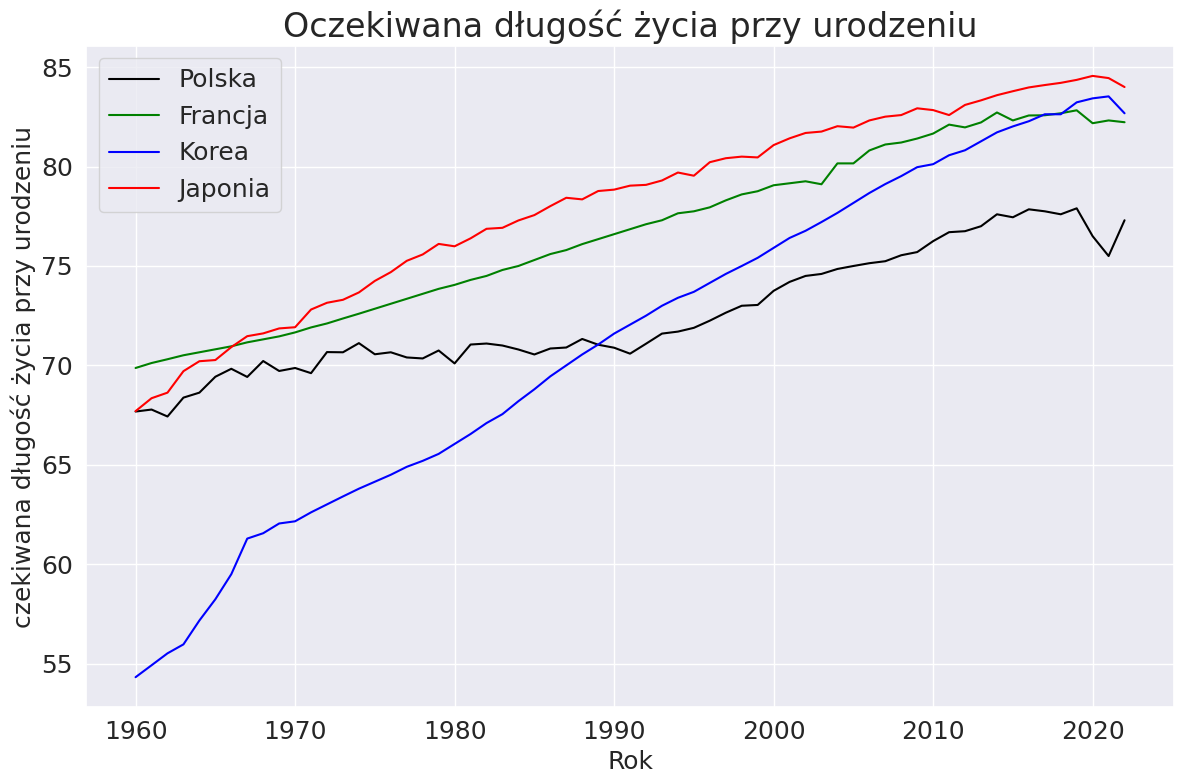

In [ ]:
# Oczekiwana długość życia przy urodzeniu w różnych krajach

plt.figure(figsize=(12, 8))

plt.plot(df_pl_life_ex.index, df_pl_life_ex['Life_Expectancy'], color='black', label='Polska')
plt.plot(df_fr_life_ex.index, df_fr_life_ex['Life_Expectancy'], color='green', label='Francja')
plt.plot(df_kr_life_ex.index, df_kr_life_ex['Life_Expectancy'], color='blue', label='Korea')
plt.plot(df_jp_life_ex.index, df_jp_life_ex['Life_Expectancy'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('czekiwana długość życia przy urodzeniu', fontsize = 18)
plt.title('Oczekiwana długość życia przy urodzeniu', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

# Saldo migracji

## Dane

In [ ]:
df_migr = pd.read_csv('https://drive.google.com/uc?id=1qXcPoxV_Be6lbR5jmFfGL1Iq1Y2sWeHw')

In [ ]:
df_migr.head(3)

Series Name  Series Code    Year Year Code  Korea, Rep. [KOR]  \
0  Net migration  SM.POP.NETM  1960.0    YR1960            23626.0   
1  Net migration  SM.POP.NETM  1961.0    YR1961           -73471.0   
2  Net migration  SM.POP.NETM  1962.0    YR1962           -84159.0   

   Japan [JPN]  France [FRA]  Poland [POL]  
0     -46245.0      160864.0      -20564.0  
1     -33403.0      177923.0      -20143.0  
2     -18594.0      189952.0      -23676.0

In [ ]:
df_migr.tail(10)

Series Name  Series Code    Year  \
58                                      Net migration  SM.POP.NETM  2018.0   
59                                      Net migration  SM.POP.NETM  2019.0   
60                                      Net migration  SM.POP.NETM  2020.0   
61                                      Net migration  SM.POP.NETM  2021.0   
62                                      Net migration  SM.POP.NETM  2022.0   
63                                                NaN          NaN     NaN   
64                                                NaN          NaN     NaN   
65                                                NaN          NaN     NaN   
66  Data from database: Health Nutrition and Popul...          NaN     NaN   
67                           Last Updated: 05/31/2024          NaN     NaN   

   Year Code  Korea, Rep. [KOR]  Japan [JPN]  France [FRA]  Poland [POL]  
58    YR2018           118642.0     177470.0       14391.0       -8736.0  
59    YR2019           110799.0     183953.0       17403.0       -2974.0  
60    YR2020                0.0      87584.0       18335.0        -779.0  
61    YR2021            43440.0      87584.0       20614.0       -2968.0  
62    YR2022            29998.0      99994.0       66601.0     3366387.0  
63       NaN                NaN          NaN           NaN           NaN  
64       NaN                NaN          NaN           NaN           NaN  
65       NaN                NaN          NaN           NaN           NaN  
66       NaN                NaN          NaN           NaN           NaN  
67       NaN                NaN          NaN           NaN           NaN

In [ ]:
df_migr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series Name        65 non-null     object 
 1   Series Code        63 non-null     object 
 2   Year               63 non-null     float64
 3   Year Code          63 non-null     object 
 4   Korea, Rep. [KOR]  63 non-null     float64
 5   Japan [JPN]        63 non-null     float64
 6   France [FRA]       63 non-null     float64
 7   Poland [POL]       63 non-null     float64
dtypes: float64(5), object(3)
memory usage: 4.4+ KB


In [ ]:
# Stworzenie nowej kolumny Date
df_migr['Date'] = pd.to_datetime(df_migr['Year'], format='%Y')

In [ ]:
df_migr = df_migr[df_migr['Series Code'] == 'SM.POP.NETM']

In [ ]:
df_migr

Series Name  Series Code    Year Year Code  Korea, Rep. [KOR]  \
0   Net migration  SM.POP.NETM  1960.0    YR1960            23626.0   
1   Net migration  SM.POP.NETM  1961.0    YR1961           -73471.0   
2   Net migration  SM.POP.NETM  1962.0    YR1962           -84159.0   
3   Net migration  SM.POP.NETM  1963.0    YR1963           -73934.0   
4   Net migration  SM.POP.NETM  1964.0    YR1964          -103826.0   
..            ...          ...     ...       ...                ...   
58  Net migration  SM.POP.NETM  2018.0    YR2018           118642.0   
59  Net migration  SM.POP.NETM  2019.0    YR2019           110799.0   
60  Net migration  SM.POP.NETM  2020.0    YR2020                0.0   
61  Net migration  SM.POP.NETM  2021.0    YR2021            43440.0   
62  Net migration  SM.POP.NETM  2022.0    YR2022            29998.0   

    Japan [JPN]  France [FRA]  Poland [POL]       Date  
0      -46245.0      160864.0      -20564.0 1960-01-01  
1      -33403.0      177923.0      -20143.0 1961-01-01  
2      -18594.0      189952.0      -23676.0 1962-01-01  
3        3819.0      198822.0      -19321.0 1963-01-01  
4       29206.0      203089.0      -19967.0 1964-01-01  
..          ...           ...           ...        ...  
58     177470.0       14391.0       -8736.0 2018-01-01  
59     183953.0       17403.0       -2974.0 2019-01-01  
60      87584.0       18335.0        -779.0 2020-01-01  
61      87584.0       20614.0       -2968.0 2021-01-01  
62      99994.0       66601.0     3366387.0 2022-01-01  

[63 rows x 9 columns]

### Korea

In [ ]:
df_kr_migr = df_migr.loc[:, ['Date', 'Korea, Rep. [KOR]']]

In [ ]:
df_kr_migr

Date  Korea, Rep. [KOR]
0  1960-01-01            23626.0
1  1961-01-01           -73471.0
2  1962-01-01           -84159.0
3  1963-01-01           -73934.0
4  1964-01-01          -103826.0
..        ...                ...
58 2018-01-01           118642.0
59 2019-01-01           110799.0
60 2020-01-01                0.0
61 2021-01-01            43440.0
62 2022-01-01            29998.0

[63 rows x 2 columns]

In [ ]:
df_kr_migr.rename(columns = {'Korea, Rep. [KOR]': 'Migration'}, inplace=True)

In [ ]:
df_kr_migr.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_kr_migr['Migration'] = df_kr_migr['Migration'].astype(float).round(2)

In [ ]:
df_kr_migr

Migration
Date                 
1960-01-01    23626.0
1961-01-01   -73471.0
1962-01-01   -84159.0
1963-01-01   -73934.0
1964-01-01  -103826.0
...               ...
2018-01-01   118642.0
2019-01-01   110799.0
2020-01-01        0.0
2021-01-01    43440.0
2022-01-01    29998.0

[63 rows x 1 columns]

### Japonia

In [ ]:
df_jp_migr = df_migr.loc[:, ['Date', 'Japan [JPN]']]

In [ ]:
df_jp_migr

Date  Japan [JPN]
0  1960-01-01     -46245.0
1  1961-01-01     -33403.0
2  1962-01-01     -18594.0
3  1963-01-01       3819.0
4  1964-01-01      29206.0
..        ...          ...
58 2018-01-01     177470.0
59 2019-01-01     183953.0
60 2020-01-01      87584.0
61 2021-01-01      87584.0
62 2022-01-01      99994.0

[63 rows x 2 columns]

In [ ]:
df_jp_migr.rename(columns = {'Japan [JPN]': 'Migration'}, inplace=True)

In [ ]:
df_jp_migr.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_jp_migr['Migration'] = df_jp_migr['Migration'].astype(float).round(2)

In [ ]:
df_jp_migr

Migration
Date                 
1960-01-01   -46245.0
1961-01-01   -33403.0
1962-01-01   -18594.0
1963-01-01     3819.0
1964-01-01    29206.0
...               ...
2018-01-01   177470.0
2019-01-01   183953.0
2020-01-01    87584.0
2021-01-01    87584.0
2022-01-01    99994.0

[63 rows x 1 columns]

### Francja

In [ ]:
df_fr_migr = df_migr.loc[:, ['Date', 'France [FRA]']]

In [ ]:
df_fr_migr

Date  France [FRA]
0  1960-01-01      160864.0
1  1961-01-01      177923.0
2  1962-01-01      189952.0
3  1963-01-01      198822.0
4  1964-01-01      203089.0
..        ...           ...
58 2018-01-01       14391.0
59 2019-01-01       17403.0
60 2020-01-01       18335.0
61 2021-01-01       20614.0
62 2022-01-01       66601.0

[63 rows x 2 columns]

In [ ]:
df_fr_migr.rename(columns = {'France [FRA]': 'Migration'}, inplace=True)

In [ ]:
df_fr_migr.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_fr_migr['Migration'] = df_fr_migr['Migration'].astype(float).round(2)

In [ ]:
df_fr_migr

Migration
Date                 
1960-01-01   160864.0
1961-01-01   177923.0
1962-01-01   189952.0
1963-01-01   198822.0
1964-01-01   203089.0
...               ...
2018-01-01    14391.0
2019-01-01    17403.0
2020-01-01    18335.0
2021-01-01    20614.0
2022-01-01    66601.0

[63 rows x 1 columns]

### Polska

In [ ]:
df_pl_migr = df_migr.loc[:, ['Date', 'Poland [POL]']]

In [ ]:
df_pl_migr

Date  Poland [POL]
0  1960-01-01      -20564.0
1  1961-01-01      -20143.0
2  1962-01-01      -23676.0
3  1963-01-01      -19321.0
4  1964-01-01      -19967.0
..        ...           ...
58 2018-01-01       -8736.0
59 2019-01-01       -2974.0
60 2020-01-01        -779.0
61 2021-01-01       -2968.0
62 2022-01-01     3366387.0

[63 rows x 2 columns]

In [ ]:
df_pl_migr.rename(columns = {'Poland [POL]': 'Migration'}, inplace=True)

In [ ]:
df_pl_migr.set_index(['Date'], inplace=True, drop=True)

In [ ]:
df_pl_migr['Migration'] = df_pl_migr['Migration'].astype(float).round(2)

In [ ]:
df_pl_migr

Migration
Date                 
1960-01-01   -20564.0
1961-01-01   -20143.0
1962-01-01   -23676.0
1963-01-01   -19321.0
1964-01-01   -19967.0
...               ...
2018-01-01    -8736.0
2019-01-01    -2974.0
2020-01-01     -779.0
2021-01-01    -2968.0
2022-01-01  3366387.0

[63 rows x 1 columns]

## Wykres

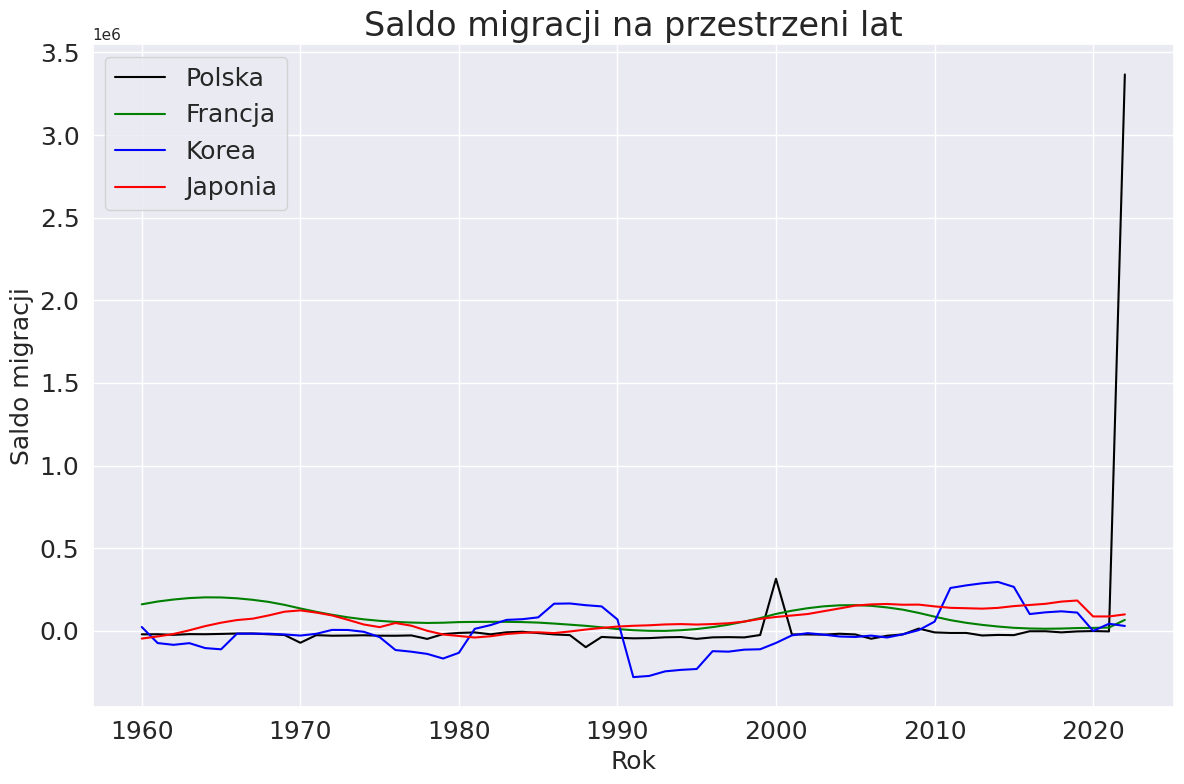

In [ ]:
# Saldo migracji - porównanie

plt.figure(figsize=(12, 8))

plt.plot(df_pl_migr.index, df_pl_migr['Migration'], color='black', label='Polska')
plt.plot(df_fr_migr.index, df_fr_migr['Migration'], color='green', label='Francja')
plt.plot(df_kr_migr.index, df_kr_migr['Migration'], color='blue', label='Korea')
plt.plot(df_jp_migr.index, df_jp_migr['Migration'], color='red', label='Japonia')

plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Saldo migracji', fontsize = 18)
plt.title('Saldo migracji na przestrzeni lat', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()

plt.show()

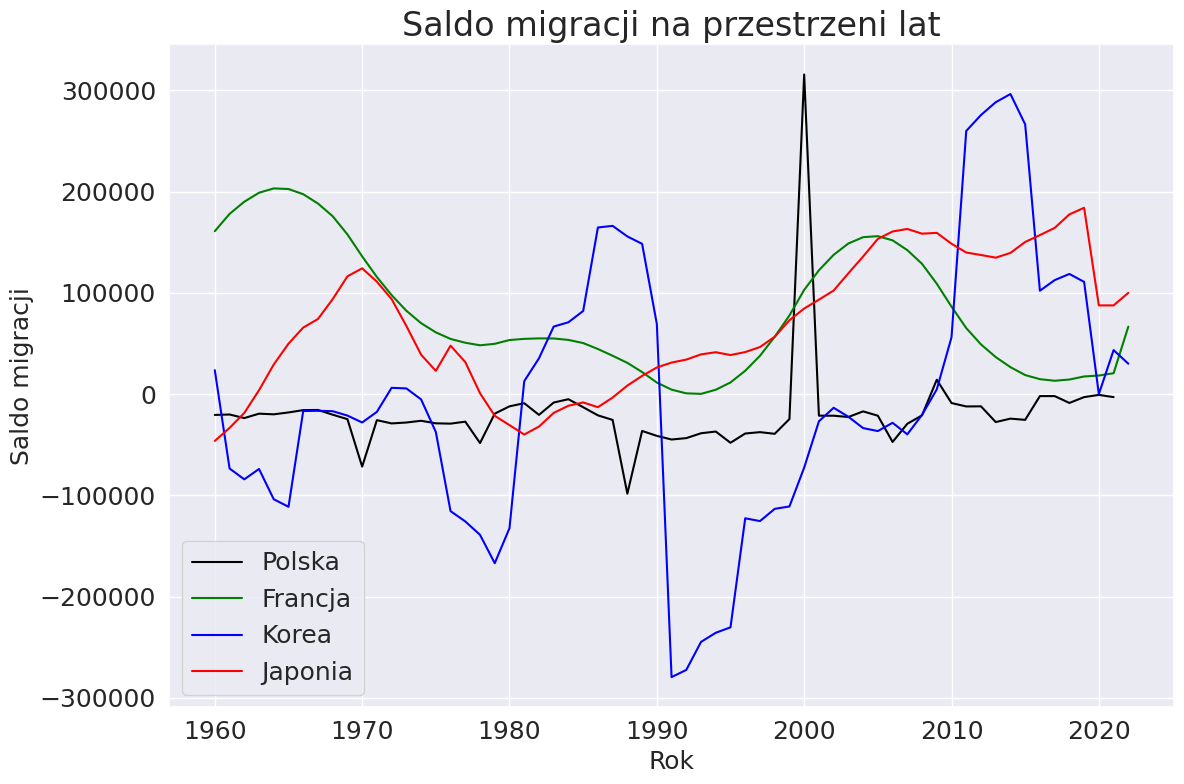

In [ ]:
# Drop the last row from df_pl_migr
df_pl_migr = df_pl_migr.drop(df_pl_migr.tail(1).index)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each country's population data
plt.plot(df_pl_migr.index, df_pl_migr['Migration'], color='black', label='Polska')
plt.plot(df_fr_migr.index, df_fr_migr['Migration'], color='green', label='Francja')
plt.plot(df_kr_migr.index, df_kr_migr['Migration'], color='blue', label='Korea')
plt.plot(df_jp_migr.index, df_jp_migr['Migration'], color='red', label='Japonia')

# Customize labels and title
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Saldo migracji', fontsize = 18)
plt.title('Saldo migracji na przestrzeni lat', fontsize = 24)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Add legend
plt.legend(fontsize = 18)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Porównanie wybranych danych na 2023 rok

## Dane

In [ ]:
# Fertility rate 2023 jp 1.2 kr 0.72 fr 1.68 pl 1.47
# Life expectancy 2023 jp f 87.1 m 81 kr f 87.2 m 80.8 fr f 85.7 m 80 pl f 82.3 m 74.9
# Urbanization 2023 jp 92 kr 81.5 fr 81.8 pl 55.2
# Median age jp 49.5 kr 44.5 fr 42.4 pl 40

# Dane otrzymane z serwisu Statista

In [ ]:
kol = ['Fertility_Rate', 'Life_Expectancy[F]', 'Life_Expectancy[M]', 'Urbanisation', 'Median Age']

In [ ]:
dane_jp = [(1.2, 87.1, 81, 92, 49.5)]
df_jp = pd.DataFrame(dane_jp, columns=kol)
df_jp

Fertility_Rate  Life_Expectancy[F]  Life_Expectancy[M]  Urbanisation  \
0             1.2                87.1                  81            92   

   Median Age  
0        49.5

In [ ]:
dane_kr = [(0.72, 87.2, 80.8, 81.5, 44.5)]
df_kr = pd.DataFrame(dane_kr, columns=kol)
df_kr

Fertility_Rate  Life_Expectancy[F]  Life_Expectancy[M]  Urbanisation  \
0            0.72                87.2                80.8          81.5   

   Median Age  
0        44.5

In [ ]:
dane_fr = [(1.68, 85.7, 80, 81.8, 42)]
df_fr = pd.DataFrame(dane_fr, columns=kol)
df_fr

Fertility_Rate  Life_Expectancy[F]  Life_Expectancy[M]  Urbanisation  \
0            1.68                85.7                  80          81.8   

   Median Age  
0          42

In [ ]:
dane_pl = [(1.47, 82.3, 74.9, 55.2, 40)]
df_pl = pd.DataFrame(dane_pl, columns=kol)
df_pl

Fertility_Rate  Life_Expectancy[F]  Life_Expectancy[M]  Urbanisation  \
0            1.47                82.3                74.9          55.2   

   Median Age  
0          40

## Współczynnik dzietności

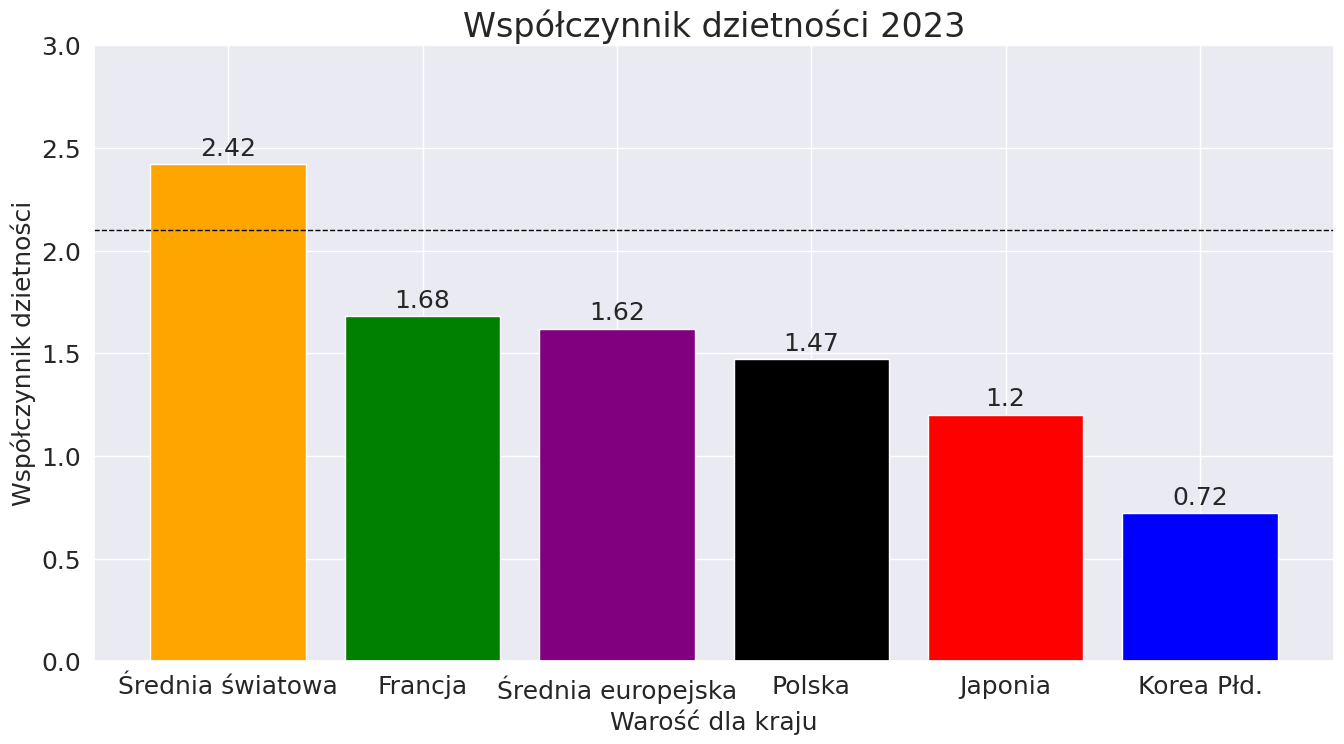

In [ ]:
# Przygotowanie pojedynczych danych

data = {
    'Kraj': ['Średnia światowa', 'Francja', 'Średnia europejska', 'Polska', 'Japonia', 'Korea Płd.'],
    'Fertility_Rate': [
        2.42,
        df_fr['Fertility_Rate'].iloc[0],
        1.62,
        df_pl['Fertility_Rate'].iloc[0],
        df_jp['Fertility_Rate'].iloc[0],
        df_kr['Fertility_Rate'].iloc[0]
    ]
}
df_all = pd.DataFrame(data)

plt.figure(figsize=(16, 8))
plt.bar(df_all['Kraj'], df_all['Fertility_Rate'], color=['orange', 'green', 'purple', 'black', 'red', 'blue'])

plt.title('Współczynnik dzietności 2023', fontsize = 24)
plt.xlabel('Warość dla kraju', fontsize = 18)
plt.ylabel('Współczynnik dzietności', fontsize = 18)

plt.ylim(0, 3) # Ograniczenie obszaru roboczego wykresu
plt.axhline(2.1, color='black', linestyle='--', linewidth=1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Dodanie wartości nad słupkami
for index, value in enumerate(df_all['Fertility_Rate']):
    plt.text(index, value + 0.02, str(value), ha='center', va='bottom', fontsize = 18)

plt.show()

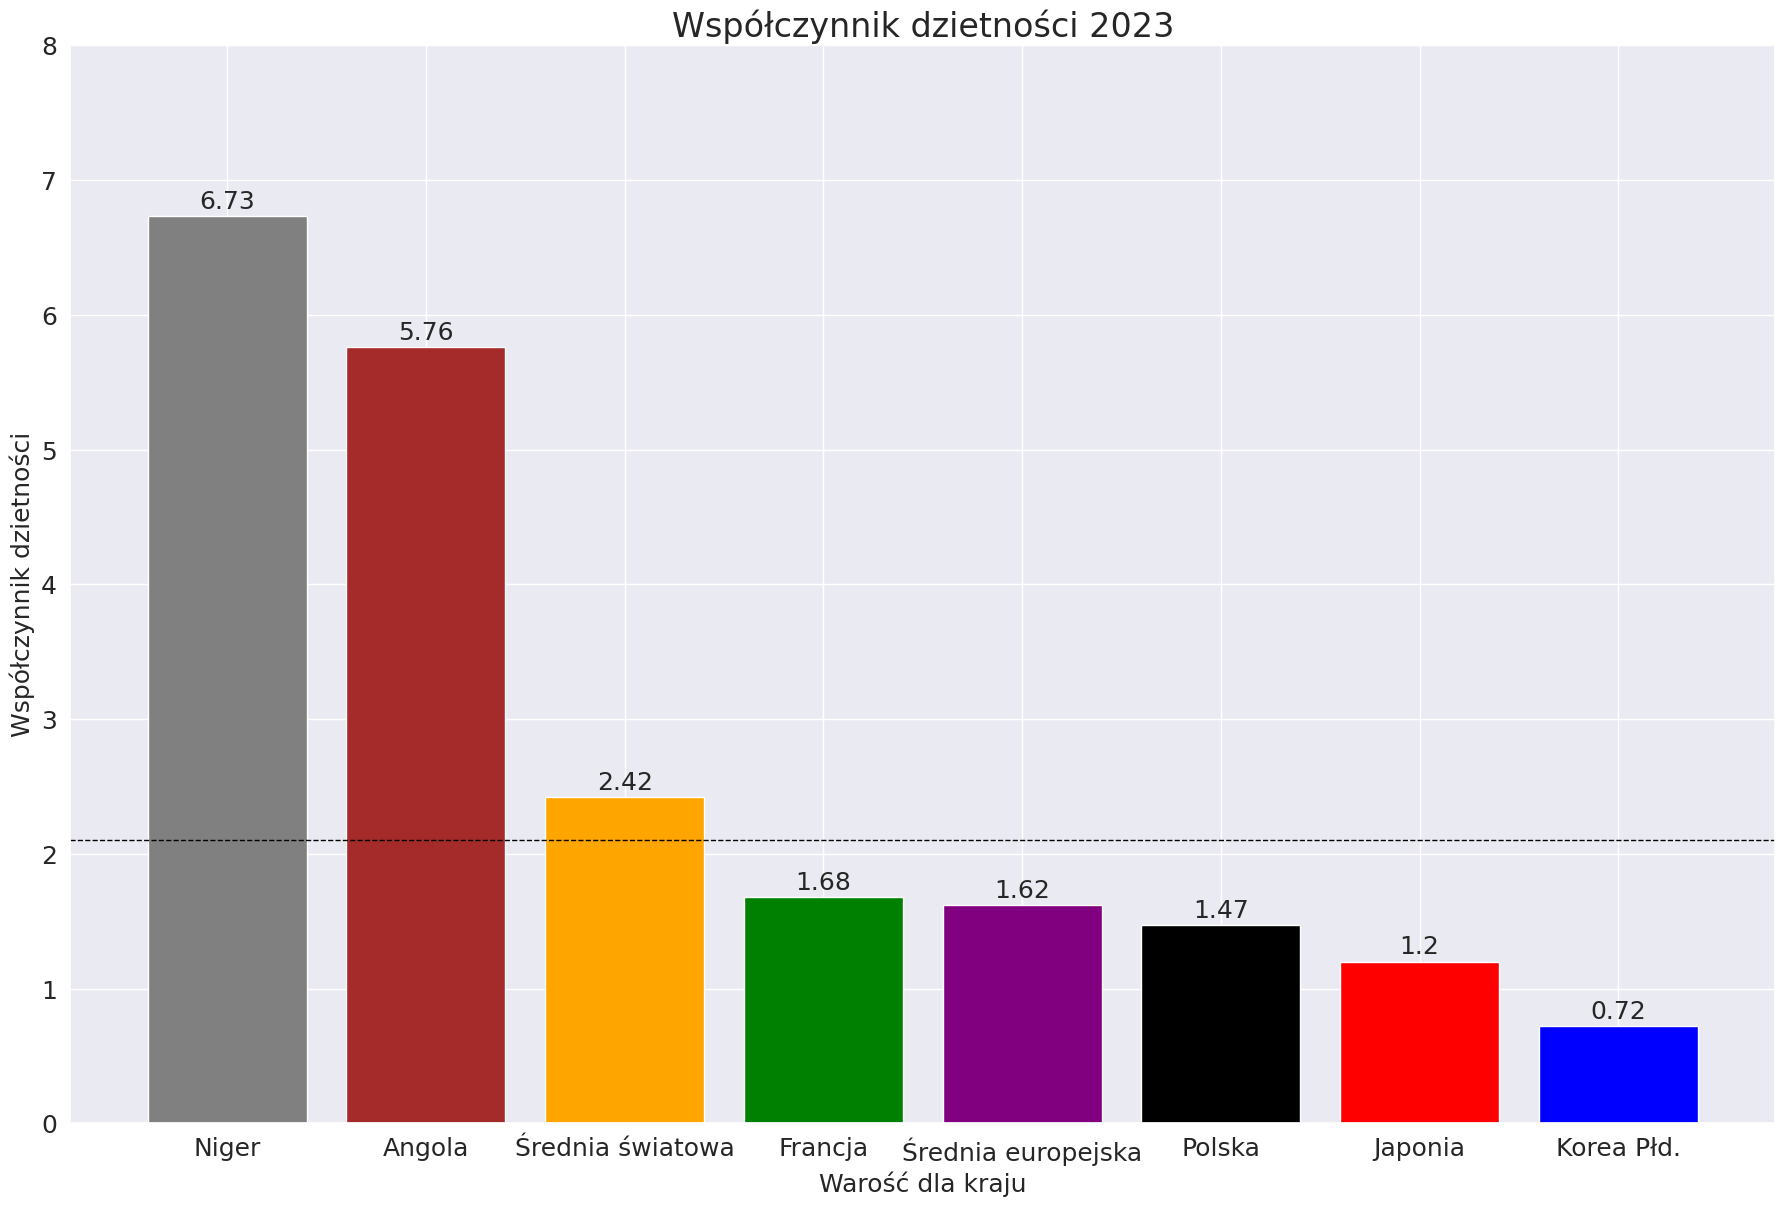

In [ ]:
data = { #
    'Kraj': ['Niger', 'Angola', 'Średnia światowa', 'Francja', 'Średnia europejska', 'Polska', 'Japonia', 'Korea Płd.'],
    'Fertility_Rate': [
        6.73,
        5.76,
        2.42,
        df_fr['Fertility_Rate'].iloc[0],
        1.62,
        df_pl['Fertility_Rate'].iloc[0],
        df_jp['Fertility_Rate'].iloc[0],
        df_kr['Fertility_Rate'].iloc[0]
    ]
}
df_all = pd.DataFrame(data)

plt.figure(figsize=(22, 14)) #
plt.bar(df_all['Kraj'], df_all['Fertility_Rate'], color=['grey', 'brown', 'orange', 'green', 'purple', 'black', 'red', 'blue'])

plt.title('Współczynnik dzietności 2023', fontsize = 24)
plt.xlabel('Warość dla kraju', fontsize = 18)
plt.ylabel('Współczynnik dzietności', fontsize = 18)

plt.ylim(0, 8)
plt.axhline(2.1, color='black', linestyle='--', linewidth=1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Dodanie wartości nad słupkami
for index, value in enumerate(df_all['Fertility_Rate']):
    plt.text(index, value + 0.02, str(value), ha='center', va='bottom', fontsize = 18)

plt.show()

## Oczekiwana długość życia

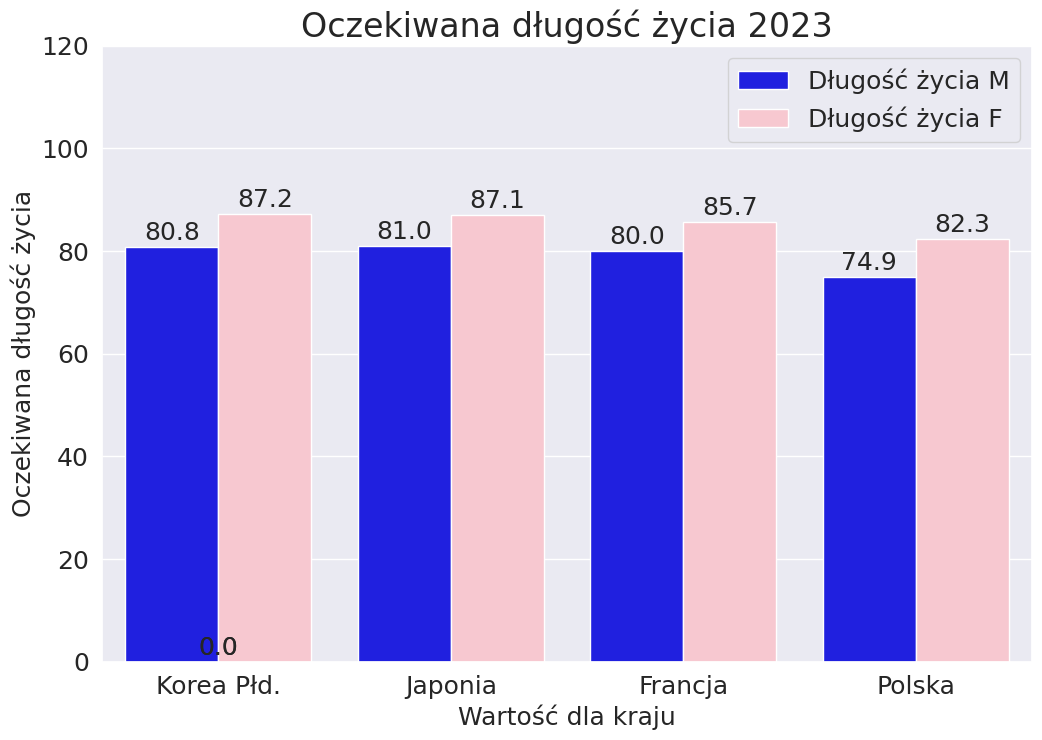

In [ ]:
# Zbieranie danych do jednego DF
data = {
    'Country': ['Korea Płd.', 'Japonia', 'Francja', 'Polska'],
    'Długość życia M': [
        df_kr['Life_Expectancy[M]'].iloc[0],
        df_jp['Life_Expectancy[M]'].iloc[0],
        df_fr['Life_Expectancy[M]'].iloc[0],
        df_pl['Life_Expectancy[M]'].iloc[0]
    ],
    'Długość życia F': [
        df_kr['Life_Expectancy[F]'].iloc[0],
        df_jp['Life_Expectancy[F]'].iloc[0],
        df_fr['Life_Expectancy[F]'].iloc[0],
        df_pl['Life_Expectancy[F]'].iloc[0]
    ]
}
df_all = pd.DataFrame(data)

# Przekształcenie danych na format długi
df_melted = pd.melt(df_all, id_vars=['Country'], value_vars=['Długość życia M', 'Długość życia F'],
                    var_name='Płeć', value_name='Life_Expectancy')

plt.figure(figsize=(12, 8))
plt.ylim(0, 120)
ax = sns.barplot(x='Country', y='Life_Expectancy', hue='Płeć', data=df_melted, palette=['blue', 'pink'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Dodanie wartości nad słupkami
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 10), fontsize = 18,
                textcoords = 'offset points')

plt.legend(fontsize = 18)
plt.title('Oczekiwana długość życia 2023', fontsize = 24)
plt.xlabel('Wartość dla kraju', fontsize = 18)
plt.ylabel('Oczekiwana długość życia', fontsize = 18)

plt.show()

## Mediana wieku

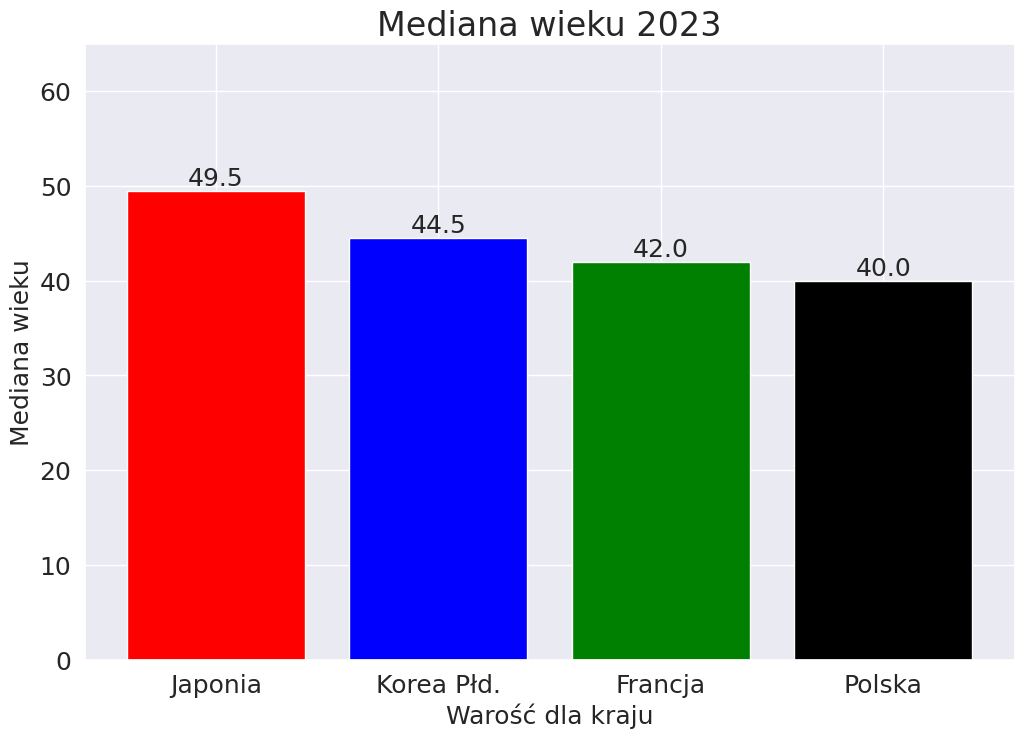

In [ ]:
data = {
    'Kraj': ['Japonia', 'Korea Płd.', 'Francja', 'Polska'],
    'Median Age': [
        df_jp['Median Age'].iloc[0],
        df_kr['Median Age'].iloc[0],
        df_fr['Median Age'].iloc[0],
        df_pl['Median Age'].iloc[0]
    ]
}
df_all = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
plt.bar(df_all['Kraj'], df_all['Median Age'], color=['red', 'blue', 'green', 'black'])

plt.title('Mediana wieku 2023', fontsize = 24)
plt.xlabel('Warość dla kraju', fontsize = 18)
plt.ylabel('Mediana wieku', fontsize = 18)

plt.ylim(0, 65)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

for index, value in enumerate(df_all['Median Age']):
    plt.text(index, value + 0.02, str(value), ha='center', va='bottom', fontsize = 18)

plt.show()

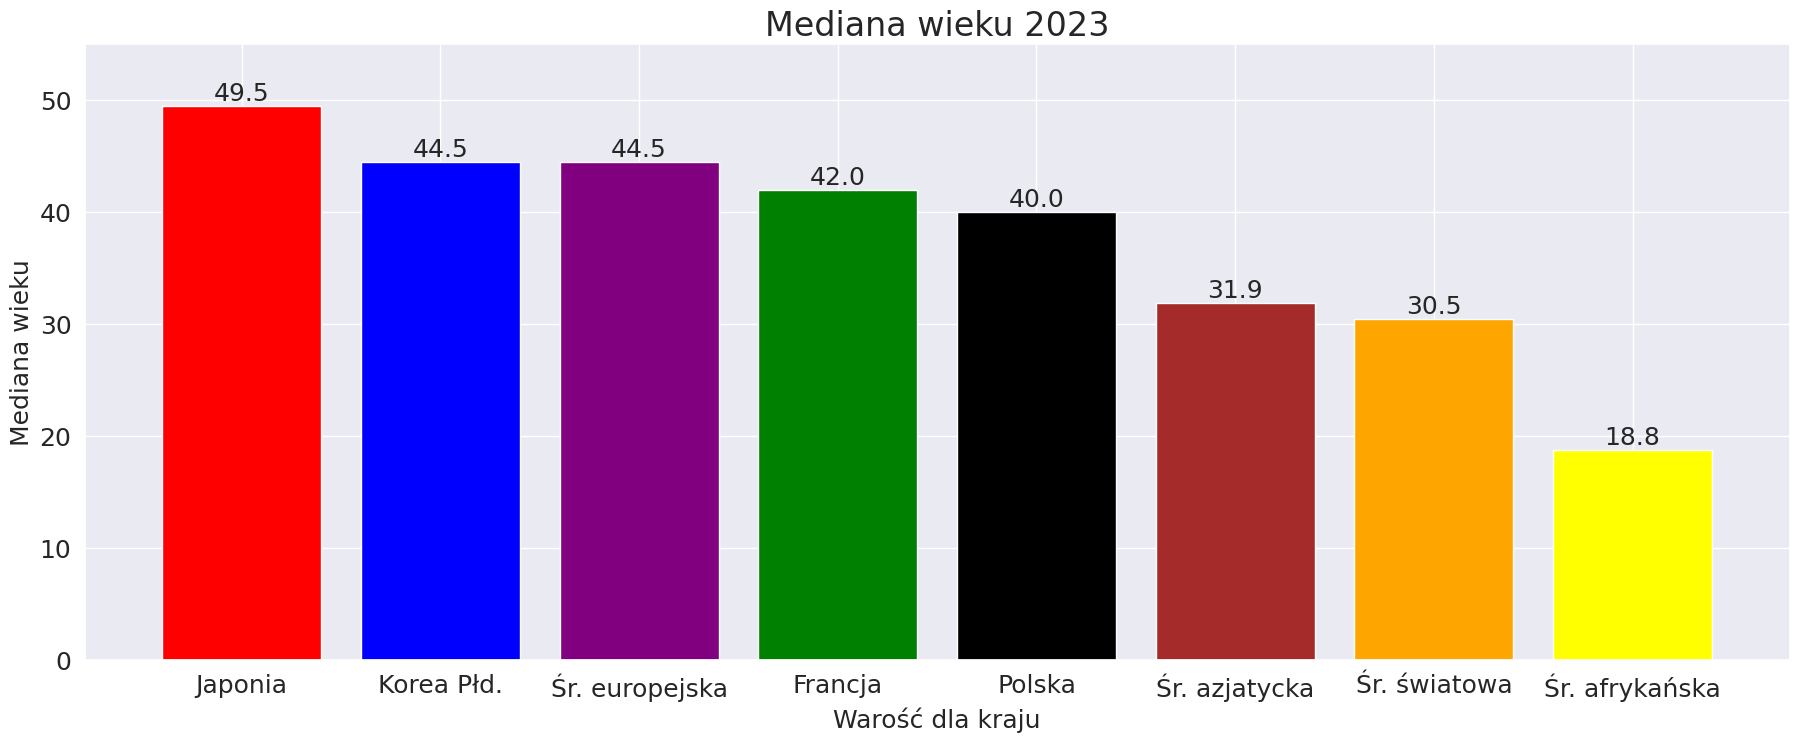

In [ ]:
# Dodanie danych dla kraju plus kilka średnich światowych
data = {
    'Kraj': ['Japonia', 'Korea Płd.', 'Śr. europejska', 'Francja', 'Polska', 'Śr. azjatycka', 'Śr. światowa', 'Śr. afrykańska'],
    'Median Age': [
        df_jp['Median Age'].iloc[0],
        df_kr['Median Age'].iloc[0],
        44.5,
        df_fr['Median Age'].iloc[0],
        df_pl['Median Age'].iloc[0],
        31.9,
        30.5,
        18.8
    ]
}
df_all = pd.DataFrame(data)

plt.figure(figsize=(22, 8))
plt.bar(df_all['Kraj'], df_all['Median Age'], color=['red', 'blue', 'purple', 'green', 'black', 'brown', 'orange', 'yellow'])

plt.title('Mediana wieku 2023', fontsize = 24)
plt.xlabel('Warość dla kraju', fontsize = 18)
plt.ylabel('Mediana wieku', fontsize = 18)

plt.ylim(0, 55)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

for index, value in enumerate(df_all['Median Age']):
    plt.text(index, value + 0.02, str(value), ha='center', va='bottom', fontsize = 18)

plt.show()

## Urbanizacja

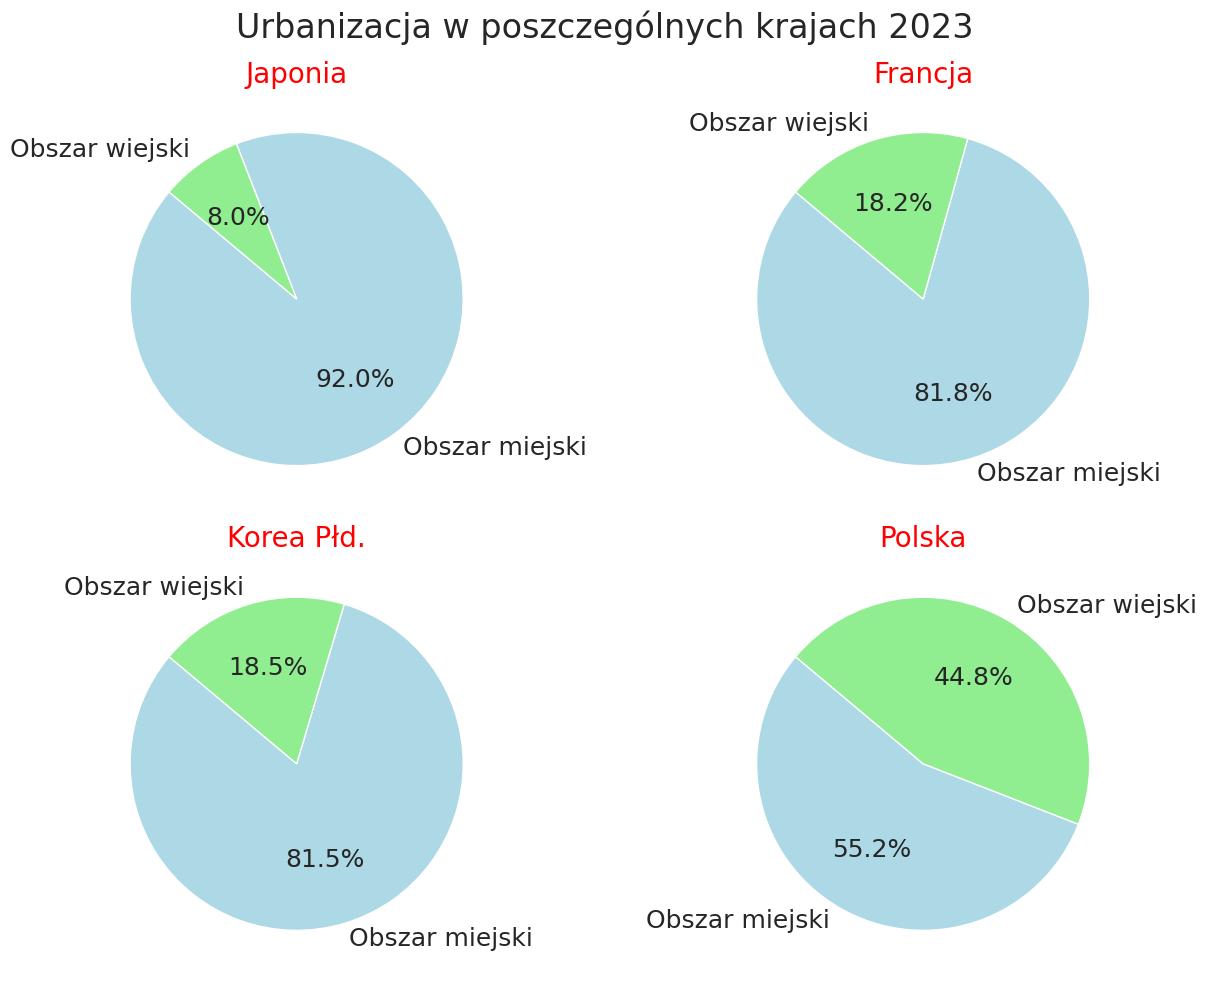

In [ ]:
data = {
    'Country': ['Japonia', 'Francja', 'Korea Płd.', 'Polska'],
    'Urbanisation': [
        df_jp['Urbanisation'].iloc[0],
        df_fr['Urbanisation'].iloc[0],
        df_kr['Urbanisation'].iloc[0],
        df_pl['Urbanisation'].iloc[0]
    ]
}
df_all = pd.DataFrame(data)

plt.figure(figsize=(13, 10))

for index, row in df_all.iterrows():
    plt.subplot(2, 2, index + 1)  # Tworzenie podwykresu dla każdego kraju
    plt.pie([row['Urbanisation'], 100 - row['Urbanisation']], labels=['Obszar miejski', 'Obszar wiejski'],
            autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140, textprops={'fontsize': 18})
    plt.title(row['Country'], fontsize = 20, color='red')

plt.suptitle('Urbanizacja w poszczególnych krajach 2023', fontsize=24)
plt.tight_layout()
plt.show()

# Prognozy

## Urodzenia żywe

### Korea

#### Dane

In [259]:
df_kr_births = pd.read_csv('https://drive.google.com/uc?id=1Y-Al7UJxAWOX5SRPOAn2Y_pbxaqAydbl')

In [260]:
df_kr_births

Period   Whole country
0     Period  Total (Person)
1    1997.01           63268
2    1997.02           58144
3    1997.03           62160
4    1997.04           56949
..       ...             ...
308  2022.08           21782
309  2022.09           21918
310  2022.10           20646
311  2022.11           18981
312  2022.12           16896

[313 rows x 2 columns]

In [261]:
df_kr_births = df_kr_births.iloc[1:,:]

In [262]:
df_kr_births = df_kr_births.rename(columns={'Whole country': 'Live_Births'})

In [263]:
df_kr_births = df_kr_births.rename(columns={'Period': 'Year'})

In [264]:
df_kr_births['Year'] = pd.to_datetime(df_kr_births['Year'], format='%Y.%m')

In [265]:
df_kr_births.set_index(df_kr_births['Year'], drop = True, inplace = True)

In [266]:
df_kr_births.drop(columns = 'Year', inplace = True)

In [267]:
df_kr_births

Live_Births
Year                  
1997-01-01       63268
1997-02-01       58144
1997-03-01       62160
1997-04-01       56949
1997-05-01       55270
...                ...
2022-08-01       21782
2022-09-01       21918
2022-10-01       20646
2022-11-01       18981
2022-12-01       16896

[312 rows x 1 columns]

#### Model

Epoch 1/50
8/8 [==============================] - 10s 409ms/step - loss: 0.0754 - val_loss: 0.0018
Epoch 2/50
8/8 [==============================] - 1s 70ms/step - loss: 0.0175 - val_loss: 0.0077
Epoch 3/50
8/8 [==============================] - 1s 80ms/step - loss: 0.0087 - val_loss: 0.0037
Epoch 4/50
8/8 [==============================] - 1s 73ms/step - loss: 0.0071 - val_loss: 0.0051
Epoch 5/50
8/8 [==============================] - 1s 84ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 6/50
8/8 [==============================] - 1s 75ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 7/50
8/8 [==============================] - 1s 76ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 8/50
8/8 [==============================] - 1s 75ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 9/50
8/8 [==============================] - 1s 114ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 10/50
8/8 [==============================] - 1s 68ms/step - loss: 0.0055 - val_loss: 0.0027
Epoch 11/50
8/8 [=========

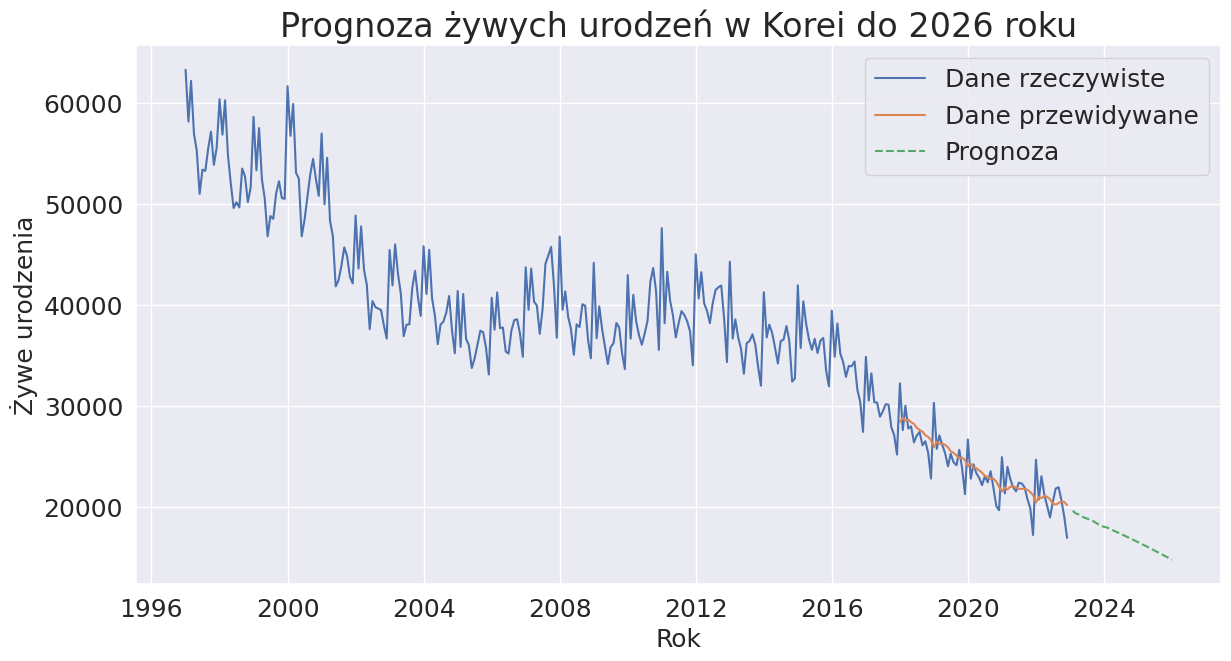

RMSE: 1772.2661643995261


In [268]:
# kopia df do procesowania
df1 = df_kr_births.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Live_Births'] = scaler.fit_transform(df1[['Live_Births']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 12

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, 1))))
model.add(Dropout(0.2))
model.add(LSTM(200, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 3 lata
future_steps = 36
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Żywe urodzenia', fontsize = 18)
plt.title('Prognoza żywych urodzeń w Korei do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [269]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2023-01-31 00:00:00  2023-02-28 00:00:00  2023-03-31 00:00:00   
1          [19578.469]          [19350.205]          [19235.422]   

                    3                    4                    5   \
0  2023-04-30 00:00:00  2023-05-31 00:00:00  2023-06-30 00:00:00   
1          [19057.348]           [18924.39]          [18815.771]   

                    6                    7                    8   \
0  2023-07-31 00:00:00  2023-08-31 00:00:00  2023-09-30 00:00:00   
1          [18733.305]           [18603.22]           [18432.06]   

                    9   ...                   26                   27  \
0  2023-10-31 00:00:00  ...  2025-03-31 00:00:00  2025-04-30 00:00:00   
1          [18251.717]  ...          [16061.566]          [15919.167]   

                    28                   29                   30  \
0  2025-05-31 00:00:00  2025-06-30 00:00:00  2025-07-31 00:00:00   
1          [15775.463]         [15630.3955]          [15483.933]   

                    31                   32                   33  \
0  2025-08-31 00:00:00  2025-09-30 00:00:00  2025-10-31 00:00:00   
1          [15336.066]          [15186.803]          [15036.113]   

                    34                   35  
0  2025-11-30 00:00:00  2025-12-31 00:00:00  
1           [14883.93]          [14730.185]  

[2 rows x 36 columns]

### Francja

#### Dane

In [189]:
df_fr_births = pd.read_csv('https://drive.google.com/uc?id=1zIQ2pLLaI6Iz2VY5KzCzCuRP6nSFUCk5', sep=';')

In [190]:
df_fr_births

Label  \
0         idBank   
1    Last update   
2         Period   
3        1994-01   
4        1994-02   
..           ...   
362      2023-12   
363      2024-01   
364      2024-02   
365      2024-03   
366      2024-04   

    Demography - Number of live births - France (including Mayotte since 2014)  \
0                                            001641601                           
1                                     30/05/2024 12:00                           
2                                                  NaN                           
3                                                58749                           
4                                                54972                           
..                                                 ...                           
362                                              55500                           
363                                              56200                           
364                                              52800                           
365                                              54700                           
366                                              53200                           

    Codes  
0     NaN  
1     NaN  
2     NaN  
3       A  
4       A  
..    ...  
362     P  
363     P  
364     P  
365     P  
366     P  

[367 rows x 3 columns]

In [191]:
df_fr_births = df_fr_births.iloc[3:,:]

In [192]:
df_fr_births = df_fr_births.rename(columns={'Demography - Number of live births - France (including Mayotte since 2014)': 'Live_Births'})

In [193]:
# w codes - A oznacza actual, P oznacza prediction
df_fr_births = df_fr_births[df_fr_births['Codes'] == 'A']

In [194]:
df_fr_births = df_fr_births.rename(columns={'Label': 'Year'})

In [195]:
df_fr_births['Year'] = pd.to_datetime(df_fr_births['Year'], format = '%Y-%m')

In [196]:
df_fr_births.set_index(df_fr_births['Year'], drop = True, inplace = True)

In [197]:
df_fr_births.drop(columns=['Codes', 'Year'], inplace = True)

In [198]:
df_fr_births

Live_Births
Year                  
1994-01-01       58749
1994-02-01       54972
1994-03-01       60734
1994-04-01       60883
1994-05-01       65386
...                ...
2022-08-01       64081
2022-09-01       60181
2022-10-01       60360
2022-11-01       59296
2022-12-01       59043

[348 rows x 1 columns]

#### Model

Epoch 1/40
9/9 [==============================] - 14s 250ms/step - loss: 0.1304 - val_loss: 0.0393
Epoch 2/40
9/9 [==============================] - 1s 72ms/step - loss: 0.0413 - val_loss: 0.0406
Epoch 3/40
9/9 [==============================] - 1s 61ms/step - loss: 0.0248 - val_loss: 0.0284
Epoch 4/40
9/9 [==============================] - 1s 65ms/step - loss: 0.0205 - val_loss: 0.0336
Epoch 5/40
9/9 [==============================] - 1s 66ms/step - loss: 0.0195 - val_loss: 0.0290
Epoch 6/40
9/9 [==============================] - 1s 63ms/step - loss: 0.0191 - val_loss: 0.0312
Epoch 7/40
9/9 [==============================] - 1s 66ms/step - loss: 0.0190 - val_loss: 0.0298
Epoch 8/40
9/9 [==============================] - 1s 72ms/step - loss: 0.0188 - val_loss: 0.0310
Epoch 9/40
9/9 [==============================] - 1s 73ms/step - loss: 0.0195 - val_loss: 0.0304
Epoch 10/40
9/9 [==============================] - 1s 76ms/step - loss: 0.0187 - val_loss: 0.0286
Epoch 11/40
9/9 [==========

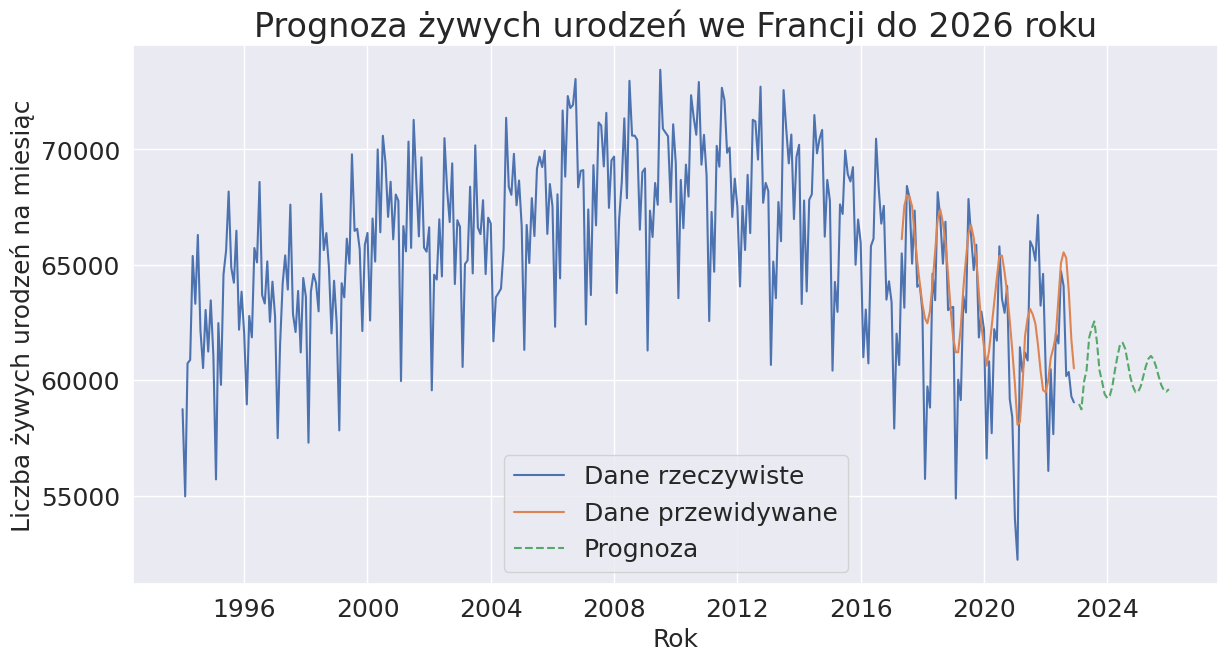

RMSE: 2744.3843230785255


In [200]:
# kopia df do procesowania
df1 = df_fr_births.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Live_Births'] = scaler.fit_transform(df1[['Live_Births']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 12

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, 1))))
model.add(Dropout(0.2))
model.add(LSTM(200, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 3 lata
future_steps = 36
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Liczba żywych urodzeń na miesiąc', fontsize = 18)
plt.title('Prognoza żywych urodzeń we Francji do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [201]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2023-01-31 00:00:00  2023-02-28 00:00:00  2023-03-31 00:00:00   
1          [58971.016]           [58738.72]           [59944.62]   

                    3                    4                    5   \
0  2023-04-30 00:00:00  2023-05-31 00:00:00  2023-06-30 00:00:00   
1          [60434.207]           [61854.31]            [62244.7]   

                    6                    7                    8   \
0  2023-07-31 00:00:00  2023-08-31 00:00:00  2023-09-30 00:00:00   
1          [62549.598]          [61661.207]           [60436.95]   

                    9   ...                   26                   27  \
0  2023-10-31 00:00:00  ...  2025-03-31 00:00:00  2025-04-30 00:00:00   
1          [59943.402]  ...          [60591.023]          [60920.816]   

                    28                   29                   30  \
0  2025-05-31 00:00:00  2025-06-30 00:00:00  2025-07-31 00:00:00   
1          [61054.246]           [60921.92]          [60596.137]   

                    31                   32                   33  \
0  2025-08-31 00:00:00  2025-09-30 00:00:00  2025-10-31 00:00:00   
1          [60173.656]          [59804.387]          [59575.363]   

                    34                   35  
0  2025-11-30 00:00:00  2025-12-31 00:00:00  
1           [59509.03]           [59615.74]  

[2 rows x 36 columns]

## Zgony

### Korea

#### Dane

In [270]:
df_kr_deaths = pd.read_csv('https://drive.google.com/uc?id=1IELvvvB7j-VaDn7CtMXZahZ2hw-_EExE')

In [271]:
df_kr_deaths.head(3)

By administrative divisions           By the kind         PERIOD  \
0               Whole country  Live births(persons)  1981.01 Month   
1               Whole country  Live births(persons)  1981.02 Month   
2               Whole country  Live births(persons)  1981.03 Month   

  Vital Statistics by Month  Unnamed: 4  
0                     88151         NaN  
1                     93556         NaN  
2                     70421         NaN

In [272]:
def convert_period_to_date(period):
    period = period.replace(' Month', '')  # usunięcie słowa 'Month'
    date = pd.to_datetime(period, format='%Y.%m')
    return date

In [273]:
# Stworzenie nowej kolumny Date
df_kr_deaths['Date'] = df_kr_deaths['PERIOD'].apply(convert_period_to_date)

In [274]:
df_kr_deaths.head(3)

By administrative divisions           By the kind         PERIOD  \
0               Whole country  Live births(persons)  1981.01 Month   
1               Whole country  Live births(persons)  1981.02 Month   
2               Whole country  Live births(persons)  1981.03 Month   

  Vital Statistics by Month  Unnamed: 4       Date  
0                     88151         NaN 1981-01-01  
1                     93556         NaN 1981-02-01  
2                     70421         NaN 1981-03-01

In [275]:
df_kr_deaths.isna().sum()

By administrative divisions        0
By the kind                        0
PERIOD                             0
Vital Statistics by Month          0
Unnamed: 4                     67918
Date                               0
dtype: int64

In [276]:
df_kr_deaths.drop(columns='Unnamed: 4', inplace=True)

In [277]:
df_kr_deaths.tail(10)

By administrative divisions                    By the kind  \
67908                        Jeju  Total Fertility Rate(persons)   
67909                        Jeju  Total Fertility Rate(persons)   
67910                        Jeju  Total Fertility Rate(persons)   
67911                        Jeju  Total Fertility Rate(persons)   
67912                        Jeju  Total Fertility Rate(persons)   
67913                        Jeju  Total Fertility Rate(persons)   
67914                        Jeju  Total Fertility Rate(persons)   
67915                        Jeju  Total Fertility Rate(persons)   
67916                        Jeju  Total Fertility Rate(persons)   
67917                        Jeju  Total Fertility Rate(persons)   

              PERIOD Vital Statistics by Month       Date  
67908  2022.03 Month                       .97 2022-03-01  
67909  2022.04 Month                      1.01 2022-04-01  
67910  2022.05 Month                       .87 2022-05-01  
67911  2022.06 Month                       .76 2022-06-01  
67912  2022.07 Month                       .86 2022-07-01  
67913  2022.08 Month                      1.08 2022-08-01  
67914  2022.09 Month                       .98 2022-09-01  
67915  2022.10 Month                       .84 2022-10-01  
67916  2022.11 Month                       .86 2022-11-01  
67917  2022.12 Month                        .7 2022-12-01

In [278]:
df_kr_deaths.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 67918 entries, 0 to 67917
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
67918 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 530.7 KB


In [279]:
df_kr_deaths.rename(columns = {'By administrative divisions': 'Divisions'}, inplace=True)

In [280]:
df_kr_deaths = df_kr_deaths[df_kr_deaths['Divisions'] == 'Whole country']

In [281]:
df_kr_deaths.head(3)

Divisions           By the kind         PERIOD  \
0  Whole country  Live births(persons)  1981.01 Month   
1  Whole country  Live births(persons)  1981.02 Month   
2  Whole country  Live births(persons)  1981.03 Month   

  Vital Statistics by Month       Date  
0                     88151 1981-01-01  
1                     93556 1981-02-01  
2                     70421 1981-03-01

In [282]:
df_kr_deaths[df_kr_deaths['By the kind'].str.contains('Death')]

Divisions      By the kind         PERIOD Vital Statistics by Month  \
806   Whole country  Deaths(persons)  1981.01 Month                         -   
807   Whole country  Deaths(persons)  1981.02 Month                         -   
808   Whole country  Deaths(persons)  1981.03 Month                         -   
809   Whole country  Deaths(persons)  1981.04 Month                         -   
810   Whole country  Deaths(persons)  1981.05 Month                         -   
...             ...              ...            ...                       ...   
1318  Whole country  Deaths(persons)  2023.09 Month                     28313   
1319  Whole country  Deaths(persons)  2023.10 Month                     30815   
1320  Whole country  Deaths(persons)  2023.11 Month                     30387   
1321  Whole country  Deaths(persons)  2023.12 Month                     32341   
1322  Whole country  Deaths(persons)  2024.01 Month                     32490   

           Date  
806  1981-01-01  
807  1981-02-01  
808  1981-03-01  
809  1981-04-01  
810  1981-05-01  
...         ...  
1318 2023-09-01  
1319 2023-10-01  
1320 2023-11-01  
1321 2023-12-01  
1322 2024-01-01  

[517 rows x 5 columns]

In [283]:
df_kr_deaths = df_kr_deaths[df_kr_deaths['By the kind'] == 'Deaths(persons)']

In [284]:
df_kr_deaths.rename(columns = {'Vital Statistics by Month': 'Deaths'}, inplace=True)

In [285]:
df_kr_deaths = df_kr_deaths.loc[:, ['Date', 'Deaths']]

In [286]:
df_kr_deaths.head()

Date Deaths
806 1981-01-01      -
807 1981-02-01      -
808 1981-03-01      -
809 1981-04-01      -
810 1981-05-01      -

In [287]:
df_kr_deaths = df_kr_deaths.loc[830:]

In [288]:
df_kr_deaths.head(10)

Date Deaths
830 1983-01-01  23147
831 1983-02-01  20099
832 1983-03-01  22632
833 1983-04-01  21767
834 1983-05-01  18412
835 1983-06-01  17343
836 1983-07-01  18088
837 1983-08-01  19683
838 1983-09-01  22250
839 1983-10-01  23340

In [289]:
df_kr_deaths.set_index(['Date'], inplace=True, drop=True)

In [290]:
df_kr_deaths['Deaths'] = df_kr_deaths['Deaths'].astype(float)

In [291]:
df_kr_deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 1983-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deaths  493 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [292]:
df_kr_deaths

Deaths
Date               
1983-01-01  23147.0
1983-02-01  20099.0
1983-03-01  22632.0
1983-04-01  21767.0
1983-05-01  18412.0
...             ...
2023-09-01  28313.0
2023-10-01  30815.0
2023-11-01  30387.0
2023-12-01  32341.0
2024-01-01  32490.0

[493 rows x 1 columns]

#### Model

Epoch 1/50
12/12 [==============================] - 10s 269ms/step - loss: 0.0044 - val_loss: 0.0173
Epoch 2/50
12/12 [==============================] - 1s 99ms/step - loss: 0.0022 - val_loss: 0.0176
Epoch 3/50
12/12 [==============================] - 2s 134ms/step - loss: 0.0022 - val_loss: 0.0130
Epoch 4/50
12/12 [==============================] - 1s 105ms/step - loss: 0.0022 - val_loss: 0.0160
Epoch 5/50
12/12 [==============================] - 1s 98ms/step - loss: 0.0022 - val_loss: 0.0179
Epoch 6/50
12/12 [==============================] - 1s 101ms/step - loss: 0.0021 - val_loss: 0.0139
Epoch 7/50
12/12 [==============================] - 1s 97ms/step - loss: 0.0021 - val_loss: 0.0131
Epoch 8/50
12/12 [==============================] - 2s 130ms/step - loss: 0.0021 - val_loss: 0.0149
Epoch 9/50
12/12 [==============================] - 2s 171ms/step - loss: 0.0019 - val_loss: 0.0137
Epoch 10/50
12/12 [==============================] - 2s 128ms/step - loss: 0.0019 - val_loss: 0.0147
E

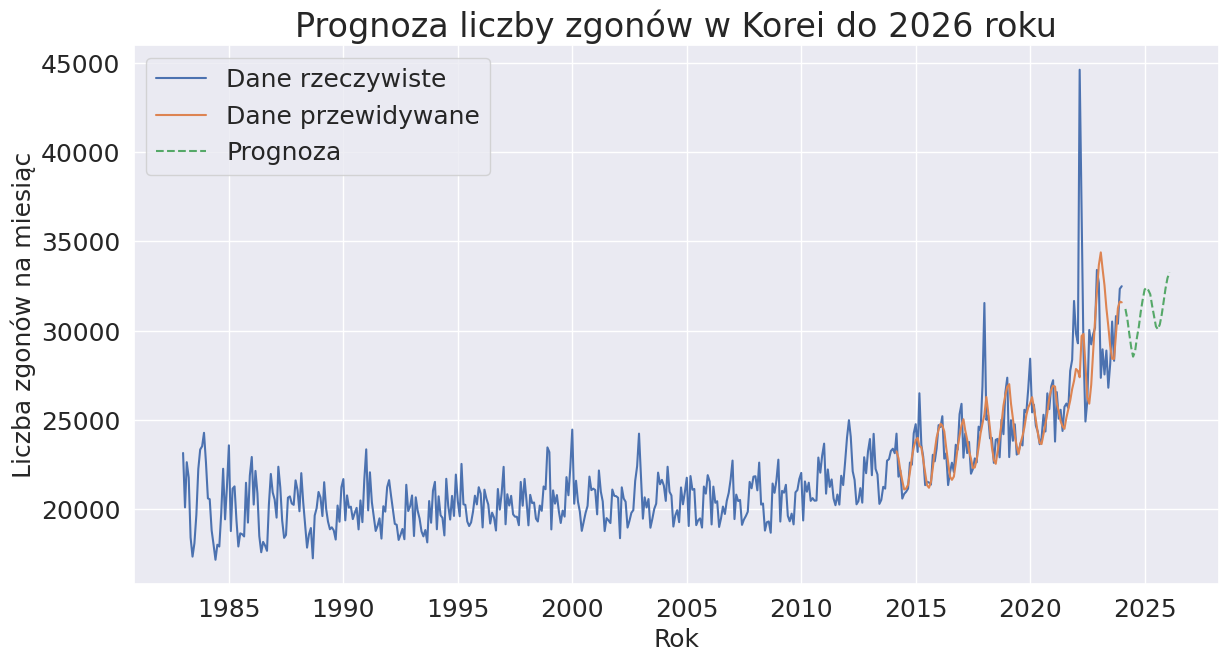

RMSE: 2365.72047624391


In [312]:
# kopia df do procesowania
df1 = df_kr_deaths.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Deaths'] = scaler.fit_transform(df1[['Deaths']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 18

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.75)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, 1))))
model.add(Dropout(0.3))
model.add(LSTM(200, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 2 lata
future_steps = 24
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Liczba zgonów na miesiąc', fontsize = 18)
plt.title('Prognoza liczby zgonów w Korei do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [294]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2024-02-29 00:00:00  2024-03-31 00:00:00  2024-04-30 00:00:00   
1           [29653.32]          [28923.803]          [28107.676]   

                    3                    4                    5   \
0  2024-05-31 00:00:00  2024-06-30 00:00:00  2024-07-31 00:00:00   
1          [27443.852]          [27091.127]          [27416.424]   

                    6                    7                    8   \
0  2024-08-31 00:00:00  2024-09-30 00:00:00  2024-10-31 00:00:00   
1          [28121.387]          [28586.826]          [29123.373]   

                    9   ...                   14                   15  \
0  2024-11-30 00:00:00  ...  2025-04-30 00:00:00  2025-05-31 00:00:00   
1          [29393.719]  ...          [27584.543]          [27034.373]   

                    16                   17                   18  \
0  2025-06-30 00:00:00  2025-07-31 00:00:00  2025-08-31 00:00:00   
1          [26612.041]          [26596.748]          [26928.496]   

                    19                   20                   21  \
0  2025-09-30 00:00:00  2025-10-31 00:00:00  2025-11-30 00:00:00   
1           [27276.39]          [27632.805]          [27876.656]   

                    22                   23  
0  2025-12-31 00:00:00  2026-01-31 00:00:00  
1          [27935.213]          [27789.264]  

[2 rows x 24 columns]

### Francja

#### Dane

In [295]:
df_fr_deaths = pd.read_csv('https://drive.google.com/uc?id=1V6H6c8Keju2PZgMxmTiDWLtd2hcK1dF8', sep=';')

In [296]:
df_fr_deaths

Label  \
0         idBank   
1    Last update   
2         Period   
3        1994-01   
4        1994-02   
..           ...   
362      2023-12   
363      2024-01   
364      2024-02   
365      2024-03   
366      2024-04   

    Demography - Number of deaths - France (including Mayotte since 2014)  \
0                                            001641603                      
1                                     31/05/2024 12:00                      
2                                                  NaN                      
3                                                50652                      
4                                                43272                      
..                                                 ...                      
362                                              62200                      
363                                              64500                      
364                                              54800                      
365                                              54200                      
366                                              49800                      

    Codes  
0     NaN  
1     NaN  
2     NaN  
3       A  
4       A  
..    ...  
362     P  
363     P  
364     P  
365     P  
366     P  

[367 rows x 3 columns]

In [297]:
df_fr_deaths = df_fr_deaths.iloc[3:,:]

In [298]:
df_fr_deaths = df_fr_deaths.rename(columns={'Demography - Number of deaths - France (including Mayotte since 2014)':'Deaths'})

In [299]:
df_fr_deaths = df_fr_deaths[df_fr_deaths['Codes'] == 'A']

In [300]:
df_fr_deaths = df_fr_deaths.rename(columns={'Label':'Year'})

In [301]:
df_fr_deaths['Year'] = pd.to_datetime(df_fr_deaths['Year'], format='%Y-%m')

In [302]:
df_fr_deaths = df_fr_deaths.set_index(df_fr_deaths['Year'], drop=True)

In [303]:
df_fr_deaths = df_fr_deaths.drop(columns=['Year', 'Codes'])

In [304]:
df_fr_deaths

Deaths
Year             
1994-01-01  50652
1994-02-01  43272
1994-03-01  45107
1994-04-01  43792
1994-05-01  42498
...           ...
2022-08-01  52838
2022-09-01  49600
2022-10-01  55868
2022-11-01  54743
2022-12-01  70566

[348 rows x 1 columns]

#### Model

Epoch 1/40
9/9 [==============================] - 10s 249ms/step - loss: 0.0307 - val_loss: 0.0670
Epoch 2/40
9/9 [==============================] - 1s 71ms/step - loss: 0.0206 - val_loss: 0.0429
Epoch 3/40
9/9 [==============================] - 1s 69ms/step - loss: 0.0185 - val_loss: 0.0522
Epoch 4/40
9/9 [==============================] - 1s 63ms/step - loss: 0.0172 - val_loss: 0.0475
Epoch 5/40
9/9 [==============================] - 1s 69ms/step - loss: 0.0163 - val_loss: 0.0442
Epoch 6/40
9/9 [==============================] - 1s 76ms/step - loss: 0.0142 - val_loss: 0.0501
Epoch 7/40
9/9 [==============================] - 1s 87ms/step - loss: 0.0114 - val_loss: 0.0488
Epoch 8/40
9/9 [==============================] - 1s 123ms/step - loss: 0.0102 - val_loss: 0.0254
Epoch 9/40
9/9 [==============================] - 1s 127ms/step - loss: 0.0100 - val_loss: 0.0178
Epoch 10/40
9/9 [==============================] - 1s 85ms/step - loss: 0.0101 - val_loss: 0.0186
Epoch 11/40
9/9 [========

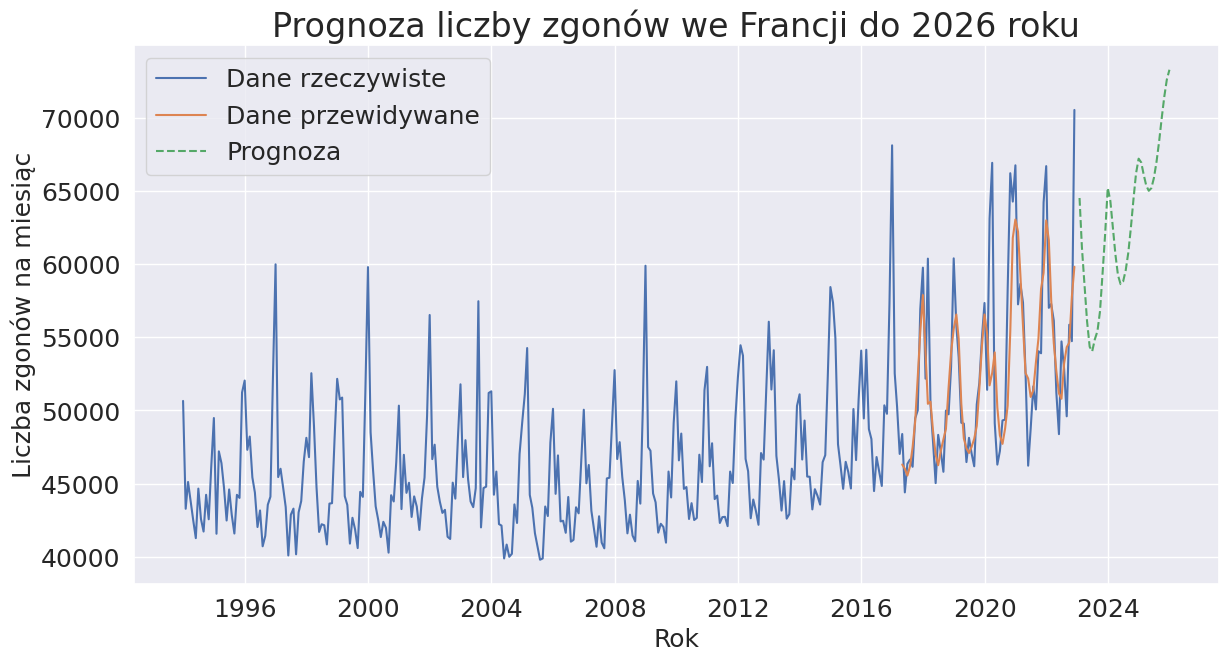

RMSE: 4035.0855251464372


In [314]:
# kopia df do procesowania
df1 = df_fr_deaths.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Deaths'] = scaler.fit_transform(df1[['Deaths']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 12

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, 1))))
model.add(Dropout(0.3))
model.add(LSTM(200, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 3 lata
future_steps = 36
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Liczba zgonów na miesiąc', fontsize = 18)
plt.title('Prognoza liczby zgonów we Francji do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [315]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2023-01-31 00:00:00  2023-02-28 00:00:00  2023-03-31 00:00:00   
1          [64540.152]          [61159.355]           [58575.43]   

                    3                    4                    5   \
0  2023-04-30 00:00:00  2023-05-31 00:00:00  2023-06-30 00:00:00   
1          [56100.613]            [54356.9]          [54047.734]   

                    6                    7                    8   \
0  2023-07-31 00:00:00  2023-08-31 00:00:00  2023-09-30 00:00:00   
1          [54870.508]          [55420.656]          [56766.746]   

                    9   ...                   26                   27  \
0  2023-10-31 00:00:00  ...  2025-03-31 00:00:00  2025-04-30 00:00:00   
1           [59406.87]  ...           [65395.05]          [65035.332]   

                    28                   29                   30  \
0  2025-05-31 00:00:00  2025-06-30 00:00:00  2025-07-31 00:00:00   
1           [65217.52]           [65909.25]          [67014.586]   

                    31                   32                   33  \
0  2025-08-31 00:00:00  2025-09-30 00:00:00  2025-10-31 00:00:00   
1           [68419.62]           [69979.96]           [71473.15]   

                    34                   35  
0  2025-11-30 00:00:00  2025-12-31 00:00:00  
1            [72640.3]           [73317.89]  

[2 rows x 36 columns]

## Wsp. dzietności

### Korea

Epoch 1/30
2/2 [==============================] - 7s 994ms/step - loss: 0.1211 - val_loss: 0.0019
Epoch 2/30
2/2 [==============================] - 0s 61ms/step - loss: 0.0656 - val_loss: 0.0013
Epoch 3/30
2/2 [==============================] - 0s 64ms/step - loss: 0.0269 - val_loss: 0.0065
Epoch 4/30
2/2 [==============================] - 0s 54ms/step - loss: 0.0085 - val_loss: 0.0163
Epoch 5/30
2/2 [==============================] - 0s 58ms/step - loss: 0.0193 - val_loss: 0.0196
Epoch 6/30
2/2 [==============================] - 0s 68ms/step - loss: 0.0214 - val_loss: 0.0145
Epoch 7/30
2/2 [==============================] - 0s 62ms/step - loss: 0.0133 - val_loss: 0.0084
Epoch 8/30
2/2 [==============================] - 0s 53ms/step - loss: 0.0084 - val_loss: 0.0044
Epoch 9/30
2/2 [==============================] - 0s 60ms/step - loss: 0.0079 - val_loss: 0.0026
Epoch 10/30
2/2 [==============================] - 0s 52ms/step - loss: 0.0090 - val_loss: 0.0019
Epoch 11/30
2/2 [===========

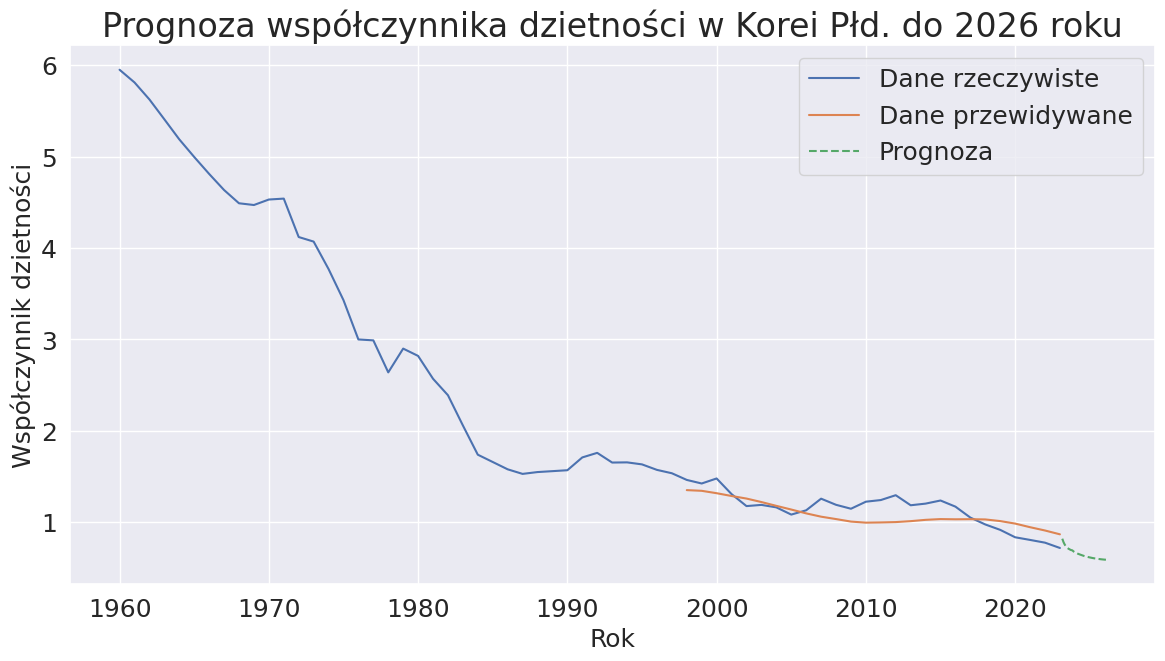

RMSE: 0.1461646115004271


In [ ]:
# kopia df do procesowania
df1 = df_kr_fert.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Fertility_Rate'] = scaler.fit_transform(df1[['Fertility_Rate']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 8

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.55)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=30, batch_size=15, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 3 lata
future_steps = 36
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Współczynnik dzietności', fontsize = 18)
plt.title('Prognoza współczynnika dzietności w Korei Płd. do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [ ]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2023-02-28 00:00:00  2023-03-31 00:00:00  2023-04-30 00:00:00   
1         [0.82132953]         [0.78262085]          [0.7559356]   

                    3                    4                    5   \
0  2023-05-31 00:00:00  2023-06-30 00:00:00  2023-07-31 00:00:00   
1          [0.7361084]           [0.720979]          [0.7117065]   

                    6                    7                    8   \
0  2023-08-31 00:00:00  2023-09-30 00:00:00  2023-10-31 00:00:00   
1          [0.7037139]          [0.6971086]         [0.69409794]   

                    9   ...                   26                   27  \
0  2023-11-30 00:00:00  ...  2025-04-30 00:00:00  2025-05-31 00:00:00   
1          [0.6821591]  ...          [0.6061687]          [0.6040033]   

                    28                   29                   30  \
0  2025-06-30 00:00:00  2025-07-31 00:00:00  2025-08-31 00:00:00   
1         [0.60198253]          [0.6000954]          [0.5983353]   

                    31                   32                   33  \
0  2025-09-30 00:00:00  2025-10-31 00:00:00  2025-11-30 00:00:00   
1         [0.59669703]           [0.595174]          [0.5937591]   

                    34                   35  
0  2025-12-31 00:00:00  2026-01-31 00:00:00  
1          [0.5924443]         [0.59121996]  

[2 rows x 36 columns]

### Polska

Epoch 1/60
2/2 [==============================] - 11s 1s/step - loss: 0.1253 - val_loss: 0.0014
Epoch 2/60
2/2 [==============================] - 0s 69ms/step - loss: 0.0231 - val_loss: 0.0067
Epoch 3/60
2/2 [==============================] - 0s 69ms/step - loss: 0.0518 - val_loss: 0.0047
Epoch 4/60
2/2 [==============================] - 0s 88ms/step - loss: 0.0293 - val_loss: 0.0015
Epoch 5/60
2/2 [==============================] - 0s 74ms/step - loss: 0.0202 - val_loss: 0.0019
Epoch 6/60
2/2 [==============================] - 0s 74ms/step - loss: 0.0283 - val_loss: 0.0026
Epoch 7/60
2/2 [==============================] - 0s 91ms/step - loss: 0.0276 - val_loss: 0.0024
Epoch 8/60
2/2 [==============================] - 0s 75ms/step - loss: 0.0212 - val_loss: 0.0019
Epoch 9/60
2/2 [==============================] - 0s 72ms/step - loss: 0.0155 - val_loss: 0.0016
Epoch 10/60
2/2 [==============================] - 0s 69ms/step - loss: 0.0131 - val_loss: 0.0015
Epoch 11/60
2/2 [=============

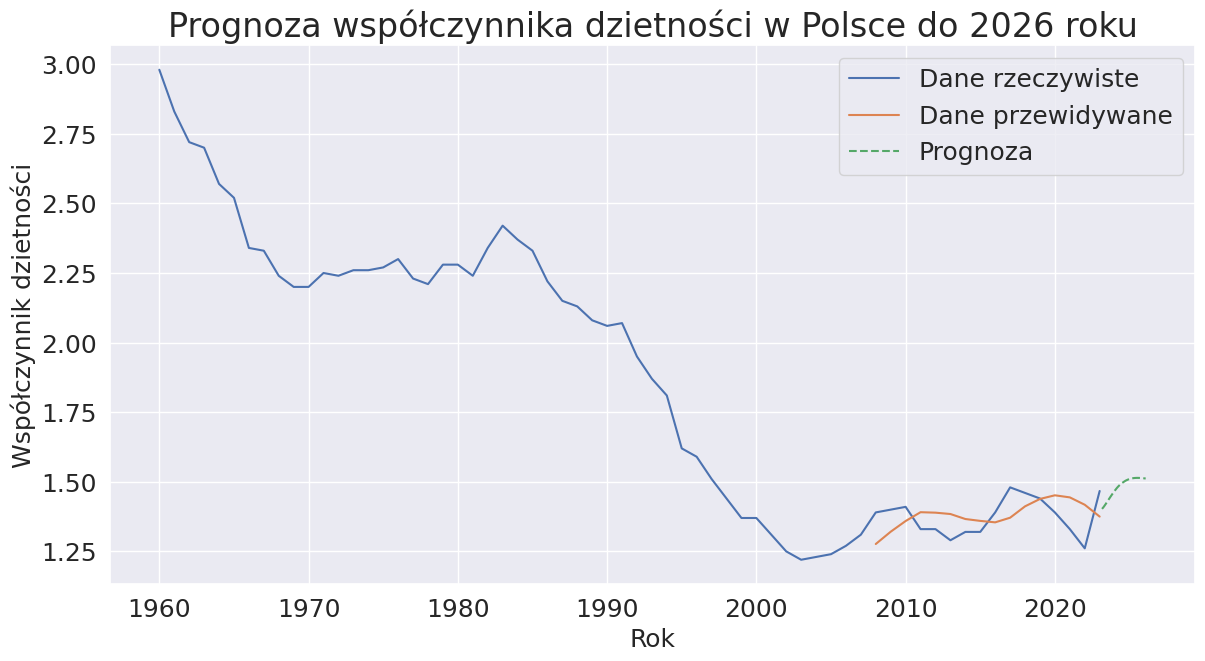

RMSE: 0.08168133079230674


In [ ]:
# kopia df do procesowania
df1 = df_pl_fert.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Fertility_Rate'] = scaler.fit_transform(df1[['Fertility_Rate']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 20

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.65)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True), input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.1))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=60, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 3 lata
future_steps = 36
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Współczynnik dzietności', fontsize = 18)
plt.title('Prognoza współczynnika dzietności w Polsce do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [ ]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2023-02-28 00:00:00  2023-03-31 00:00:00  2023-04-30 00:00:00   
1          [1.4027205]          [1.4080232]          [1.4141091]   

                    3                    4                    5   \
0  2023-05-31 00:00:00  2023-06-30 00:00:00  2023-07-31 00:00:00   
1          [1.4206856]          [1.4275204]          [1.4343824]   

                    6                    7                    8   \
0  2023-08-31 00:00:00  2023-09-30 00:00:00  2023-10-31 00:00:00   
1           [1.441206]          [1.4478945]          [1.4544878]   

                    9   ...                   26                   27  \
0  2023-11-30 00:00:00  ...  2025-04-30 00:00:00  2025-05-31 00:00:00   
1          [1.4608561]  ...          [1.5135641]          [1.5138958]   

                    28                   29                   30  \
0  2025-06-30 00:00:00  2025-07-31 00:00:00  2025-08-31 00:00:00   
1          [1.5140457]           [1.514037]          [1.5138917]   

                    31                   32                   33  \
0  2025-09-30 00:00:00  2025-10-31 00:00:00  2025-11-30 00:00:00   
1          [1.5136306]          [1.5132743]          [1.5128416]   

                    34                   35  
0  2025-12-31 00:00:00  2026-01-31 00:00:00  
1          [1.5123501]          [1.5118163]  

[2 rows x 36 columns]

## Populacja

### Japonia

Epoch 1/20
3/3 [==============================] - 19s 746ms/step - loss: 0.2180 - val_loss: 0.3712
Epoch 2/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0923 - val_loss: 0.0518
Epoch 3/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0284 - val_loss: 0.0841
Epoch 4/20
3/3 [==============================] - 0s 54ms/step - loss: 0.0282 - val_loss: 4.2426e-04
Epoch 5/20
3/3 [==============================] - 0s 51ms/step - loss: 0.0119 - val_loss: 3.7439e-04
Epoch 6/20
3/3 [==============================] - 0s 55ms/step - loss: 0.0046 - val_loss: 0.0250
Epoch 7/20
3/3 [==============================] - 0s 52ms/step - loss: 0.0075 - val_loss: 4.0451e-04
Epoch 8/20
3/3 [==============================] - 0s 84ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 9/20
3/3 [==============================] - 0s 49ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 10/20
3/3 [==============================] - 0s 51ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 11/20
3/3

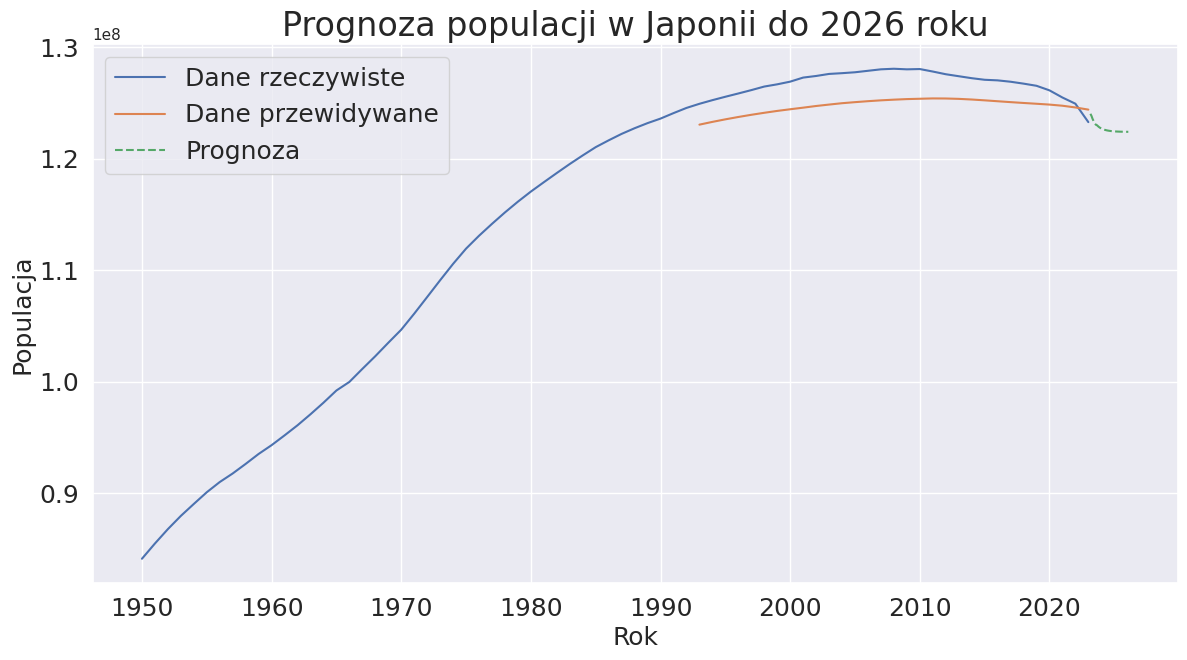

RMSE: 2196987.1072256877


In [ ]:
# kopia df do procesowania
df1 = df_jp_pop.copy()

# normalizacja
scaler = MinMaxScaler(feature_range=(0, 1))
df1['Population'] = scaler.fit_transform(df1[['Population']])

# df -> np.array
data = df1.values

# funkcja do tworzenia sekwencji
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# długość sekwencji wstecz
SEQ_LENGTH = 6

# stworzenie sekwencji
X, y = create_sequences(data, SEQ_LENGTH)

# train test split
train_size = int(len(X) * 0.55)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# dane do lstm (samples, time steps, no. features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# model lstm
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, 1))))
model.add(Dropout(0.4))
model.add(LSTM(200, activation='tanh'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.009)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# skalowanie odwrotne
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Prognoza przyszłych wartości na 3 lata
future_steps = 36
last_sequence = data[-SEQ_LENGTH:]
future_predictions = []

for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))
    next_value = model.predict(last_sequence)
    future_predictions.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

# skalowanie odwrotne
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# wykres
plt.figure(figsize=(14, 7))
plt.plot(df1.index, scaler.inverse_transform(data), label='Dane rzeczywiste')
plt.plot(df1.index[train_size+SEQ_LENGTH:], y_pred_inv, label='Dane przewidywane')
future_index = pd.date_range(df1.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_index, future_predictions_inv, label='Prognoza', linestyle='--')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel('Rok', fontsize = 18)
plt.ylabel('Populacja', fontsize = 18)
plt.title('Prognoza populacji w Japonii do 2026 roku', fontsize = 24)
plt.legend(fontsize = 18)
plt.show()

print(f'RMSE: {rmse}')

In [ ]:
out = pd.DataFrame([future_index, future_predictions_inv])
out

0                    1                    2   \
0  2023-02-28 00:00:00  2023-03-31 00:00:00  2023-04-30 00:00:00   
1        [124040800.0]        [123849944.0]        [123585496.0]   

                    3                    4                    5   \
0  2023-05-31 00:00:00  2023-06-30 00:00:00  2023-07-31 00:00:00   
1        [123381040.0]        [123197700.0]        [123061570.0]   

                    6                    7                    8   \
0  2023-08-31 00:00:00  2023-09-30 00:00:00  2023-10-31 00:00:00   
1        [123018590.0]        [122927940.0]        [122845016.0]   

                    9   ...                   26                   27  \
0  2023-11-30 00:00:00  ...  2025-04-30 00:00:00  2025-05-31 00:00:00   
1        [122779190.0]  ...        [122442744.0]        [122439120.0]   

                    28                   29                   30  \
0  2025-06-30 00:00:00  2025-07-31 00:00:00  2025-08-31 00:00:00   
1        [122436010.0]        [122433340.0]        [122431064.0]   

                    31                   32                   33  \
0  2025-09-30 00:00:00  2025-10-31 00:00:00  2025-11-30 00:00:00   
1        [122429130.0]        [122427464.0]        [122426050.0]   

                    34                   35  
0  2025-12-31 00:00:00  2026-01-31 00:00:00  
1        [122424840.0]        [122423800.0]  

[2 rows x 36 columns]